In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import io
import re
from scipy.io.wavfile import read
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.cm as cmx
from datetime import datetime, timezone
import datetime
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from pathlib import Path
from sklearn.cluster import KMeans
import copy
from scipy.stats import mode


In [2]:
def load_waveform(filepath):
    with open(filepath) as dataFile:
        data = dataFile.read()
        # Check for missing commas and insert them
        pattern = r'(\{[^{}]*"[^"]*"[^{}]*\})(?=[^{}]*\{)'
        data = re.sub(pattern, r'\1,', data)

        obj = data[data.find('{') : data.rfind('}')+1]
        jsonObj = json.loads(obj)
        
        if jsonObj['data']:
            waveform_data = pd.DataFrame(jsonObj['data'], columns=["peak_amplitude","integral","phase_angle","cycle_number","rise_time","pulse_width"])    
            return waveform_data
    return None


In [3]:
def load_dataframes(dirpath):
    dataframes = []
    for filename in os.listdir(dirpath):
        if filename.endswith(".js"):
            filepath = os.path.join(dirpath, filename)
            waveform = load_waveform(filepath)
            if not waveform.empty:
                waveform['filename'] = filename # Add filename as a column
                dataframes.append(waveform)
    return dataframes

In [4]:
dirpath1 = "ptest"
dirpath2 = "ntest"
dirpath3 = "utest"
pdf = load_dataframes(dirpath1)
ndf = load_dataframes(dirpath2)
udf = load_dataframes(dirpath3)

In [5]:
def assign_dependent_vars(dataframes, y):
    for df in dataframes:
        df['anomaly'] = y # initialize with 0
        # assign dependent variable values based on some condition
        # df.loc[df['some_column'] > 0, 'dependent_var'] = 1
        # df.loc[df['some_column'] < 0, 'dependent_var'] = 2
    return dataframes


In [6]:
pdf = assign_dependent_vars(pdf, 1) #assign dependent variables for supervised testing
ndf = assign_dependent_vars(ndf, 2)
udf = assign_dependent_vars(udf, 0)

In [7]:
# combine all list of dataframes into 1
dataframes = pdf + ndf + udf

In [8]:
print(dataframes)

[      peak_amplitude  integral  phase_angle  cycle_number  rise_time  \
0              -0.24      1219          253          8824          0   
1              -0.24      2616           34          8825          0   
2               0.00     -2638          197          8825          0   
3              -0.24       417          246          8825          0   
4              -0.24      2149           33          8826          0   
...              ...       ...          ...           ...        ...   
5632            0.25       685          315          9322          0   
5633            0.00       563           35          9323          0   
5634            0.25     -1509          353          9323          0   
5635            0.25      -539           22          9324          0   
5636            0.25       684           93          9324          0   

      pulse_width    filename  anomaly  
0               0  1047582.js        1  
1               0  1047582.js        1  
2          

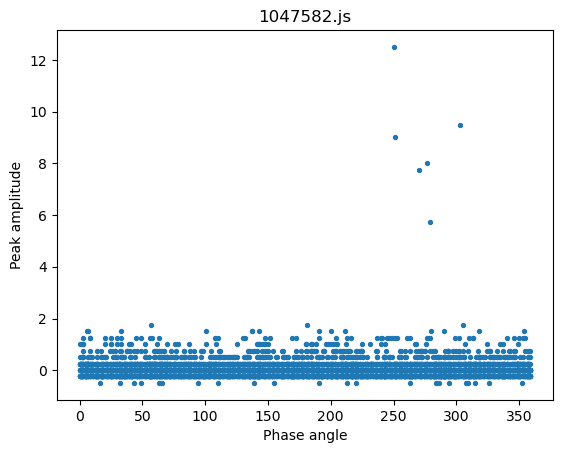

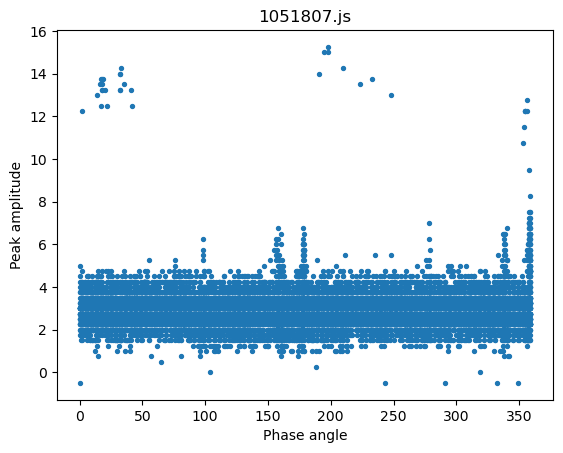

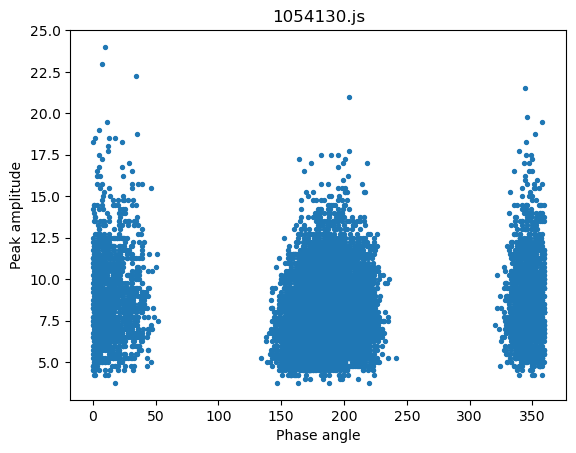

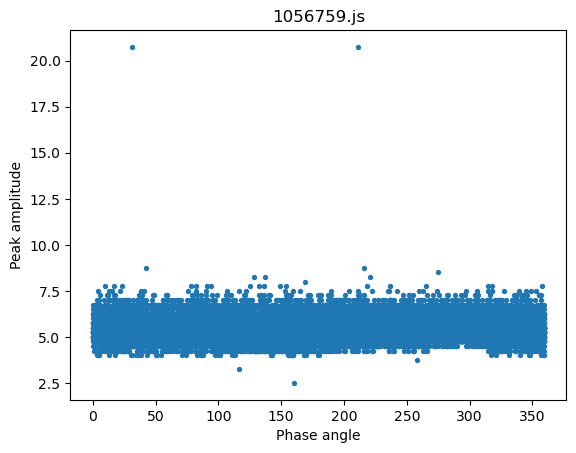

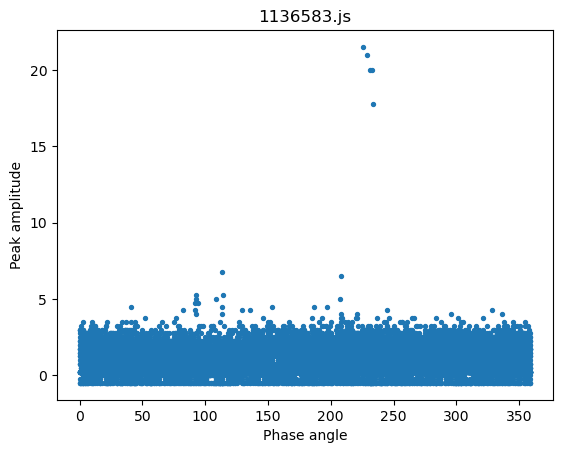

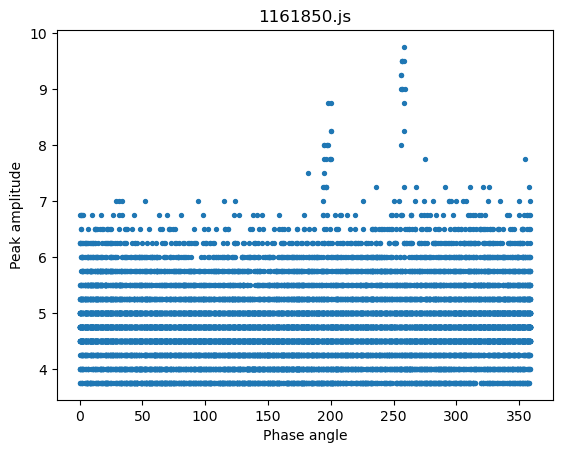

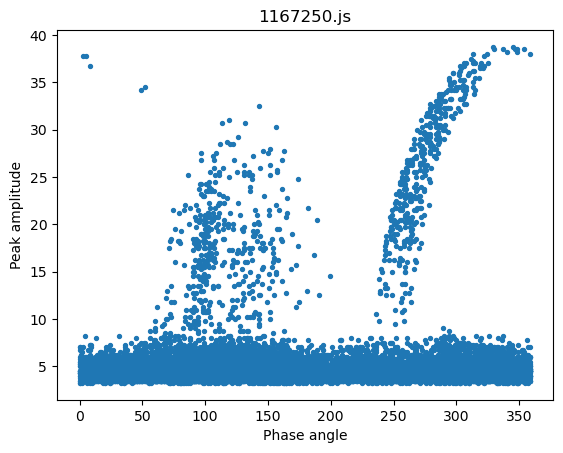

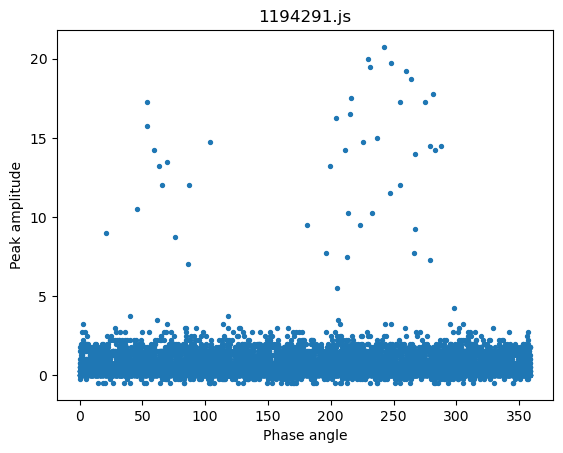

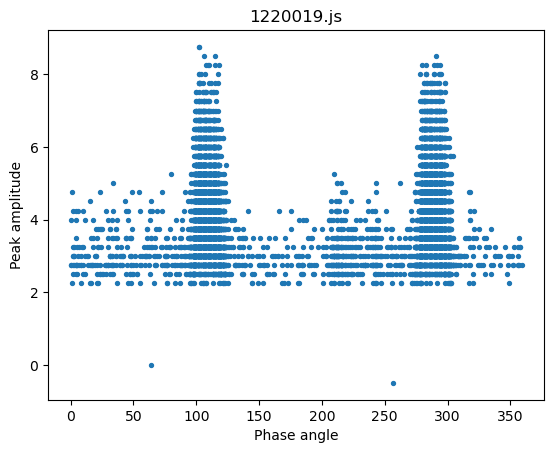

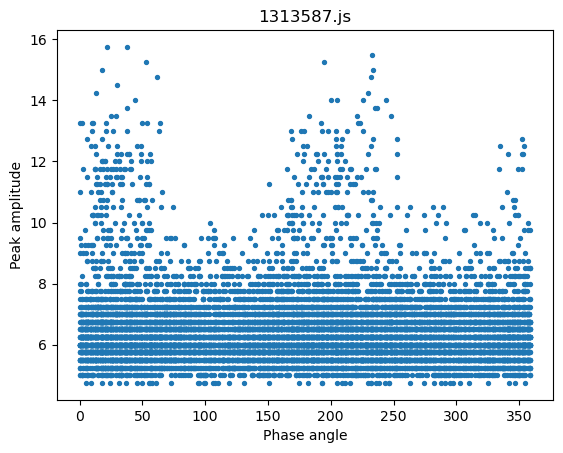

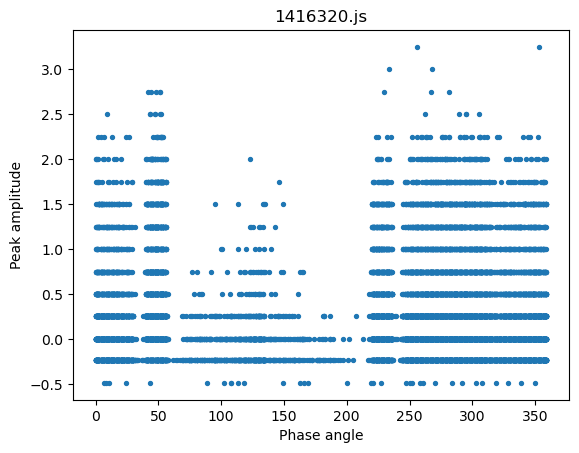

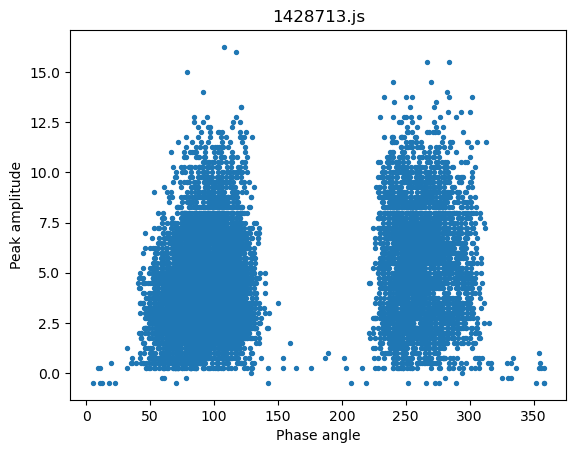

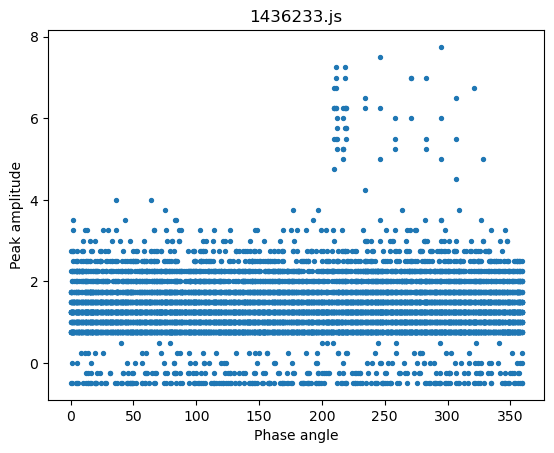

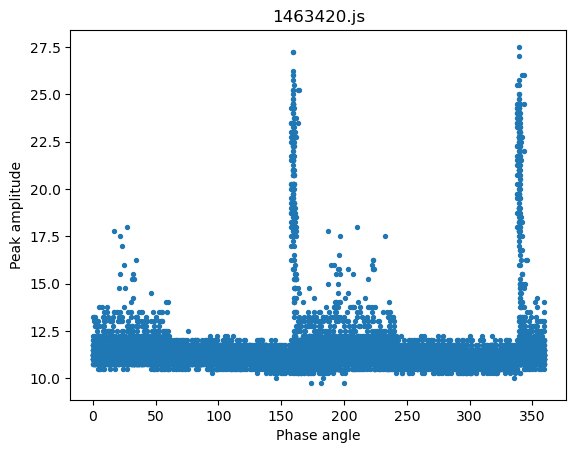

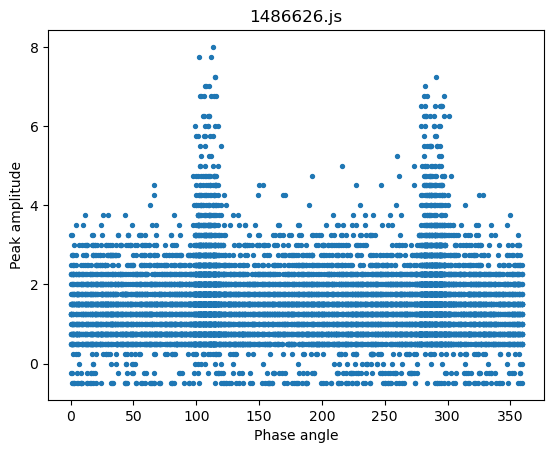

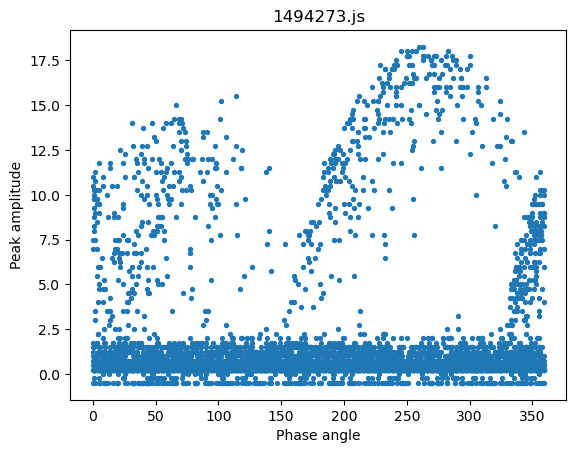

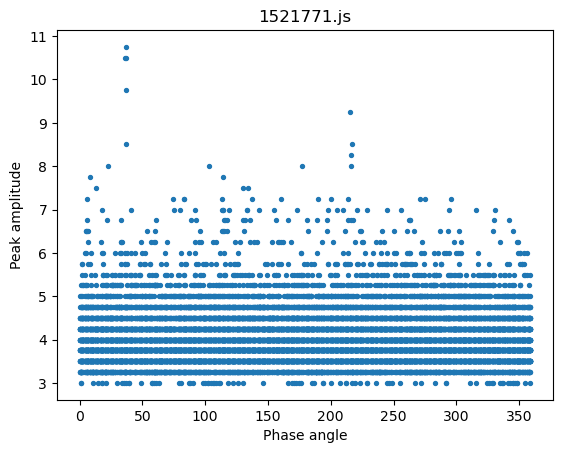

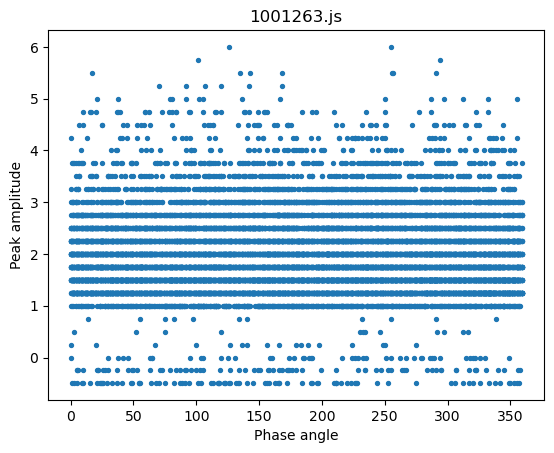

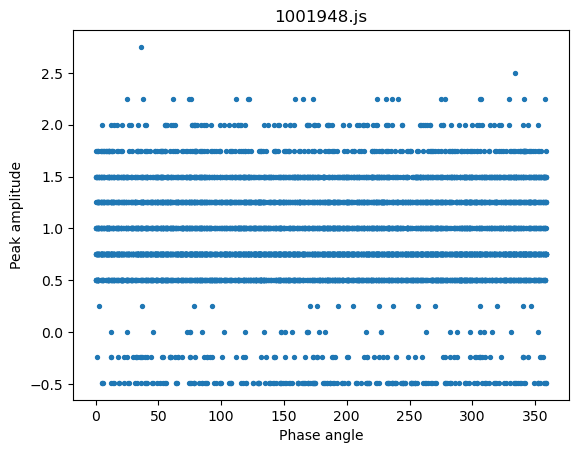

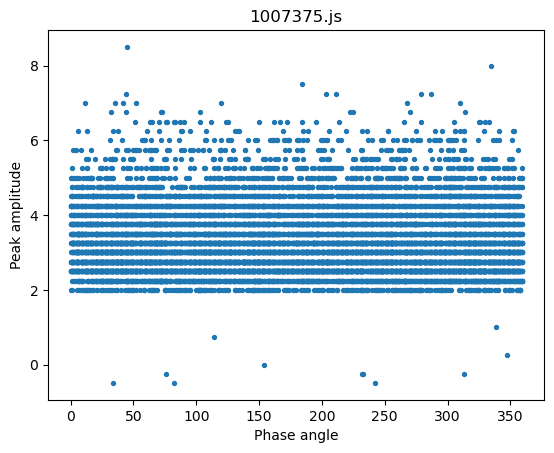

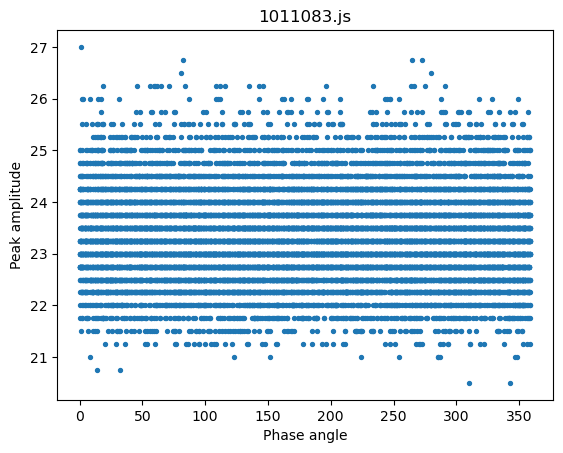

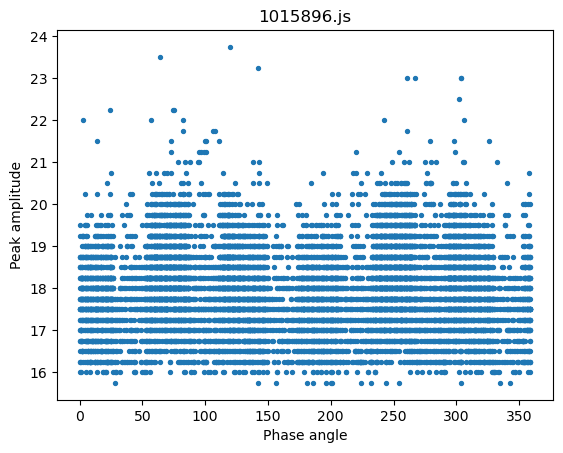

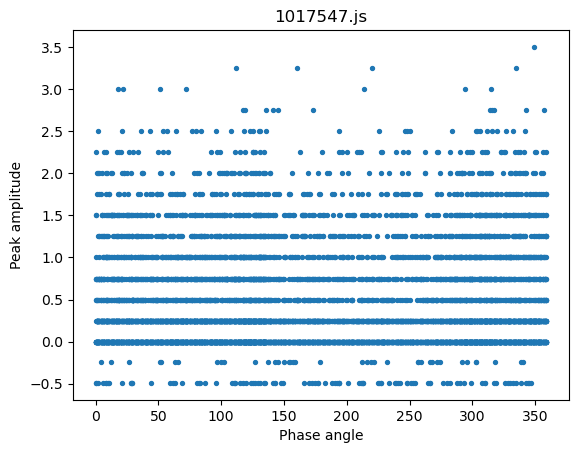

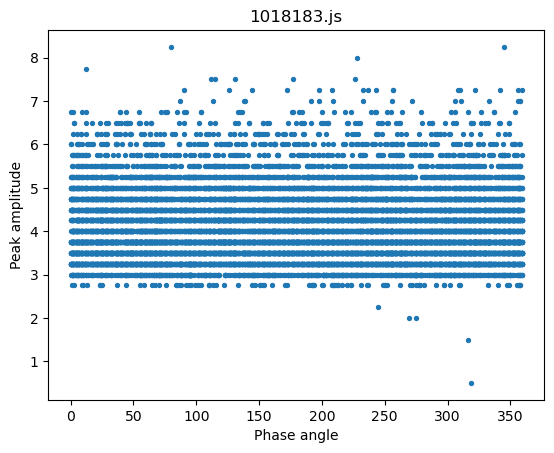

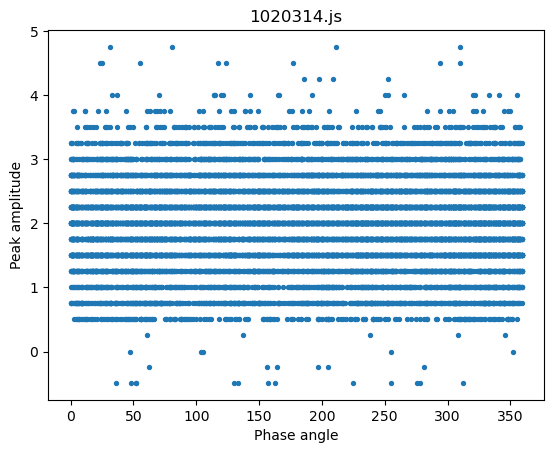

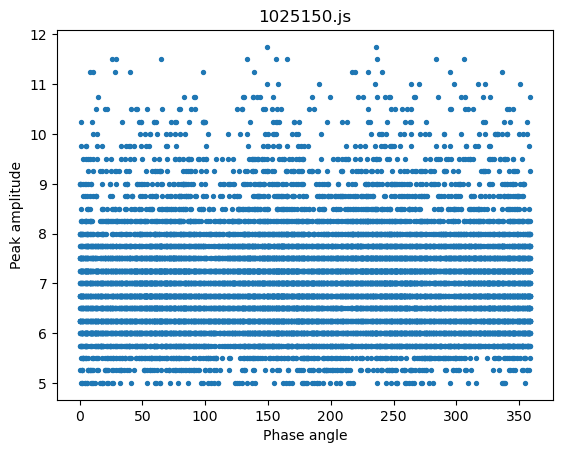

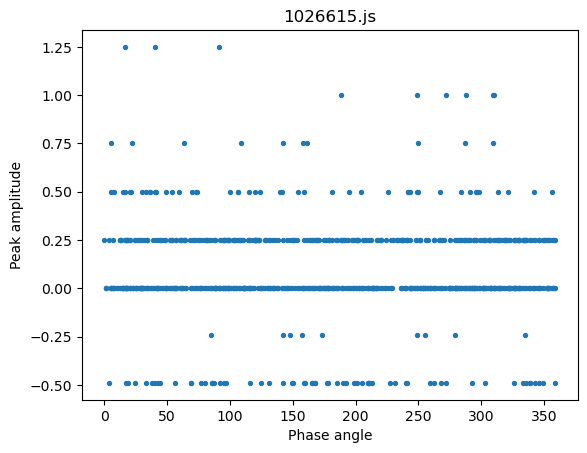

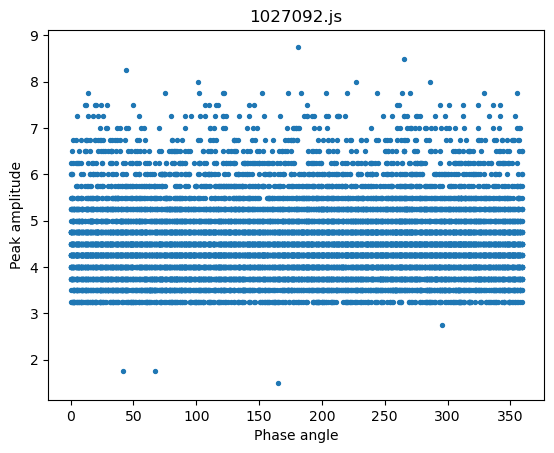

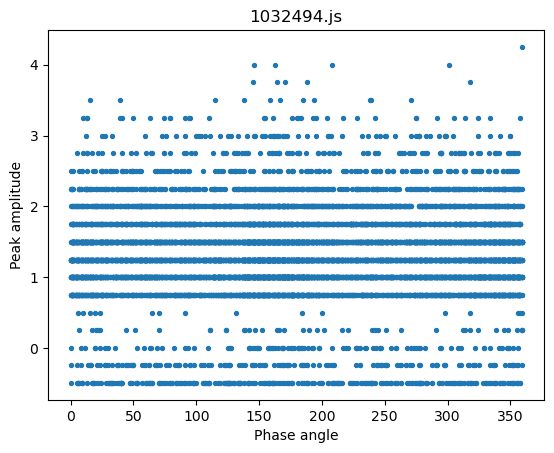

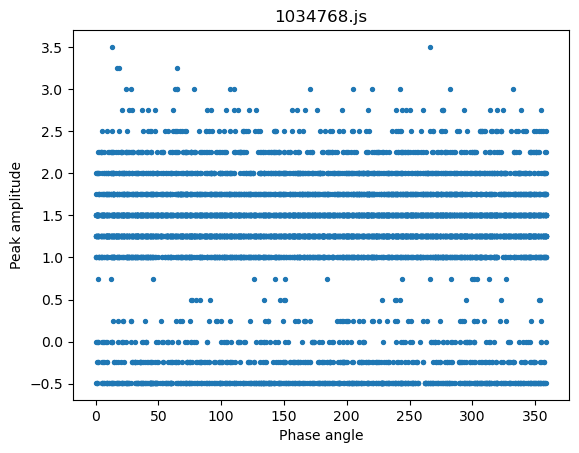

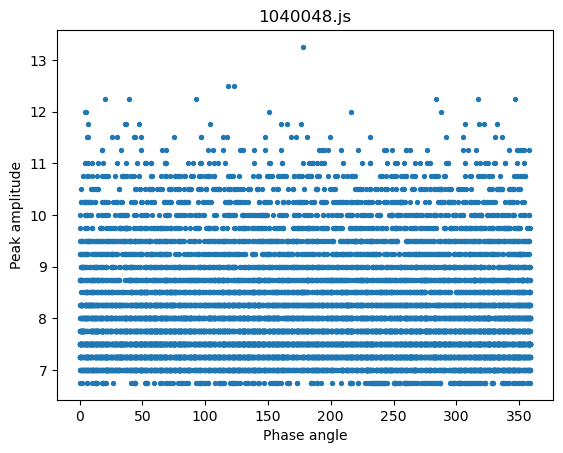

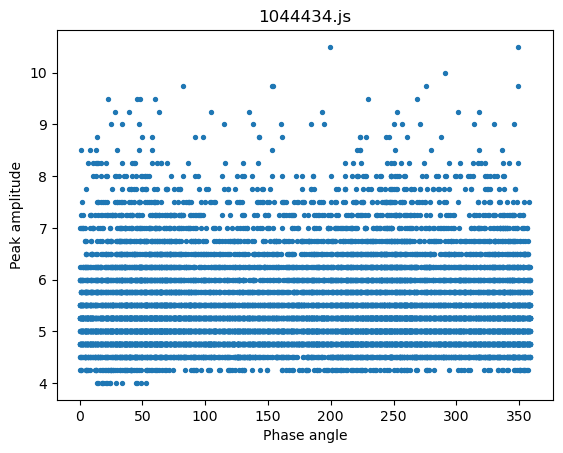

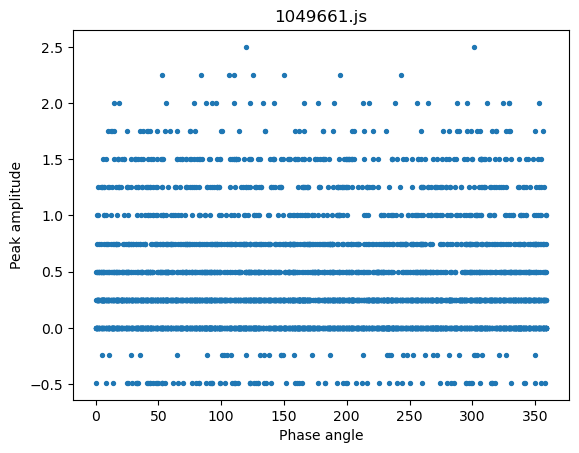

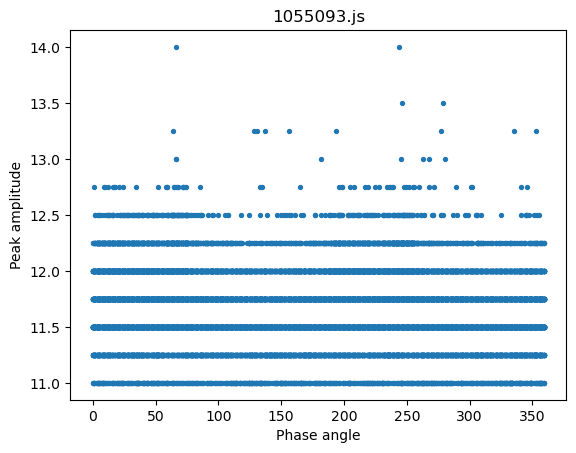

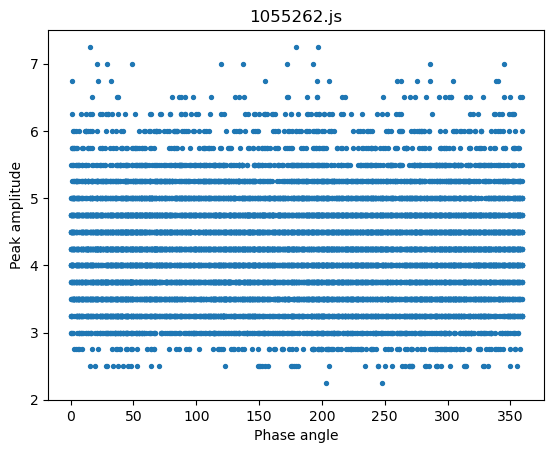

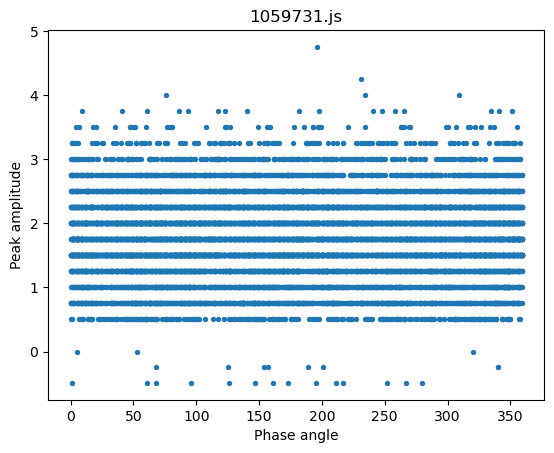

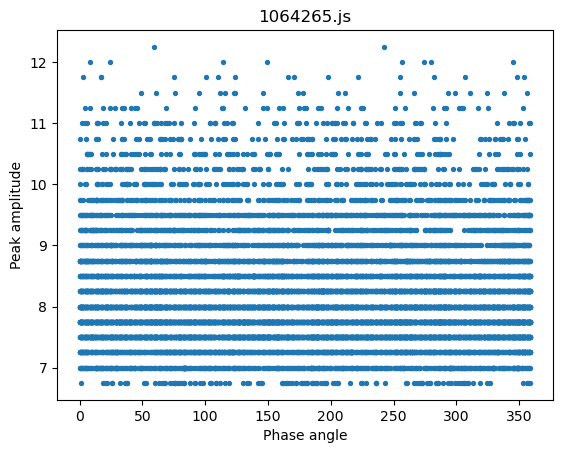

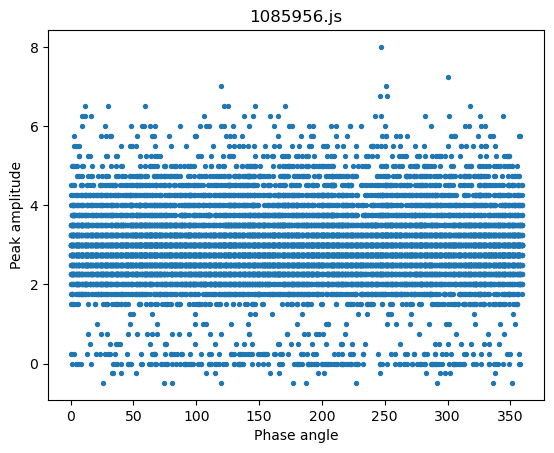

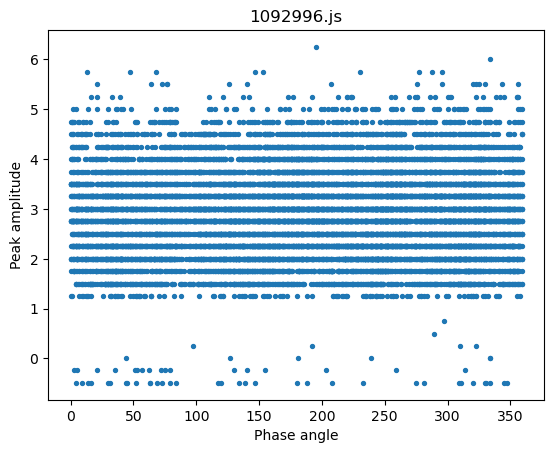

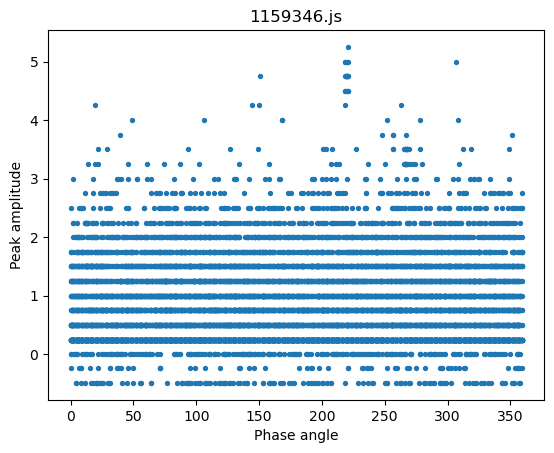

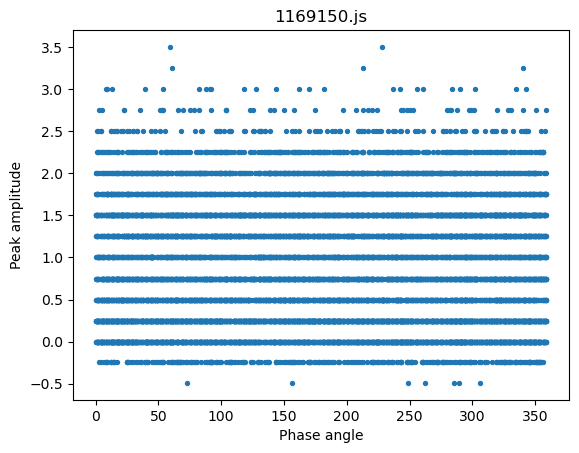

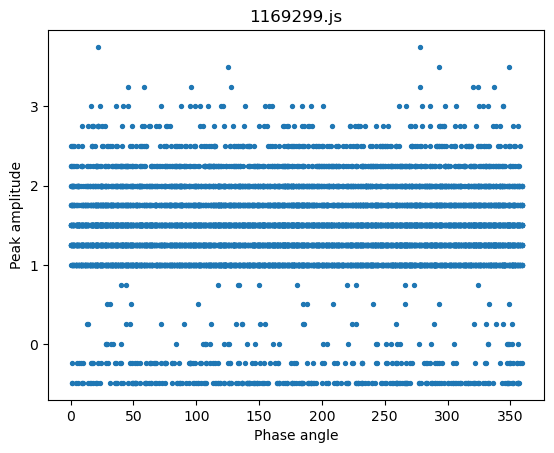

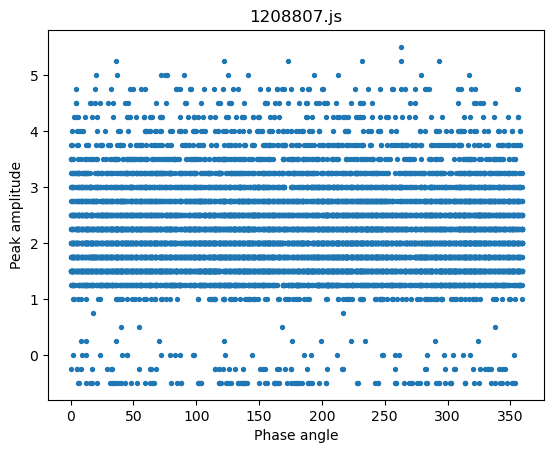

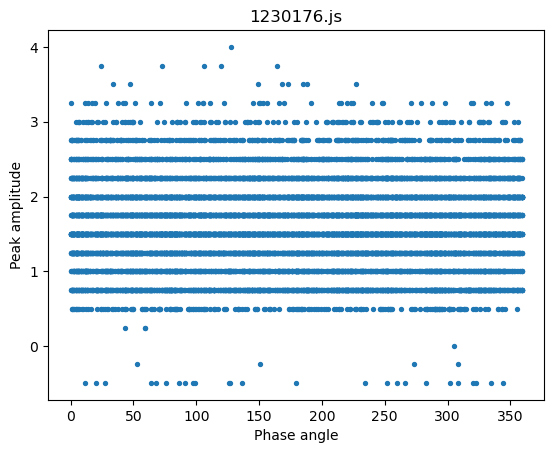

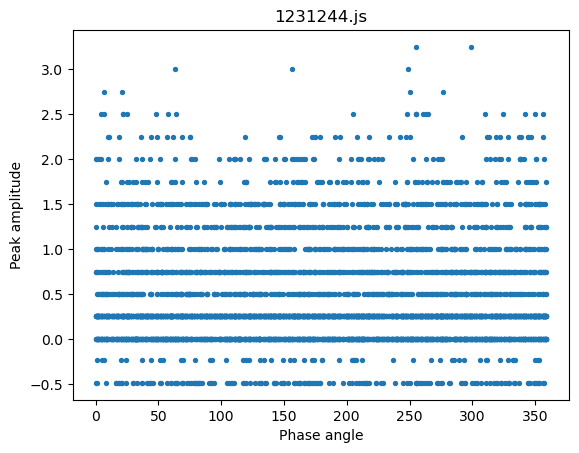

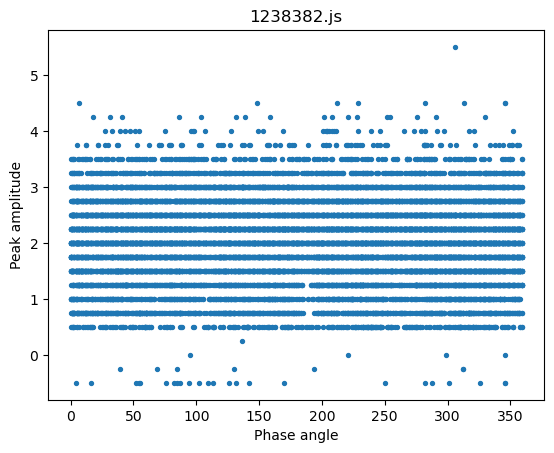

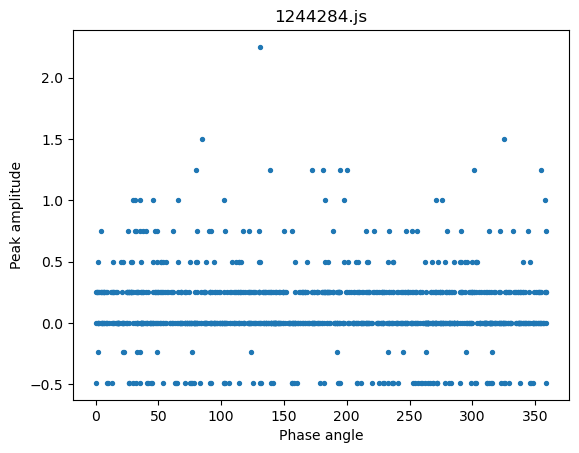

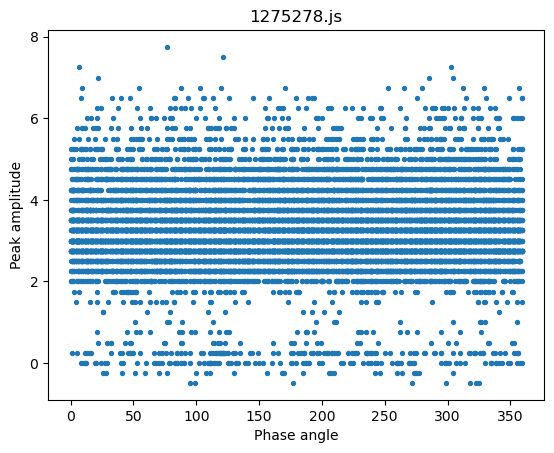

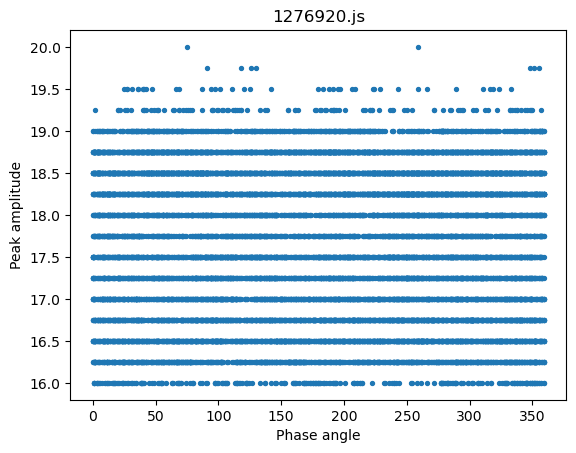

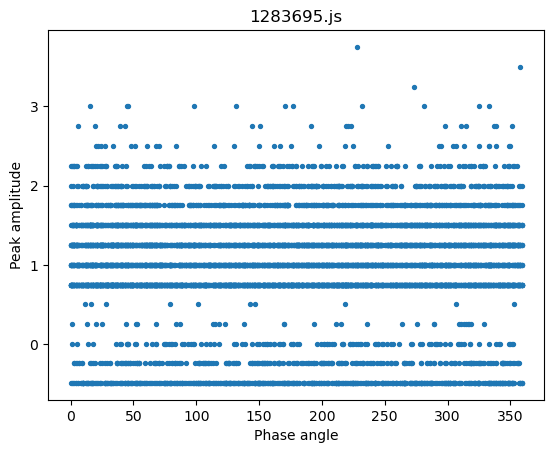

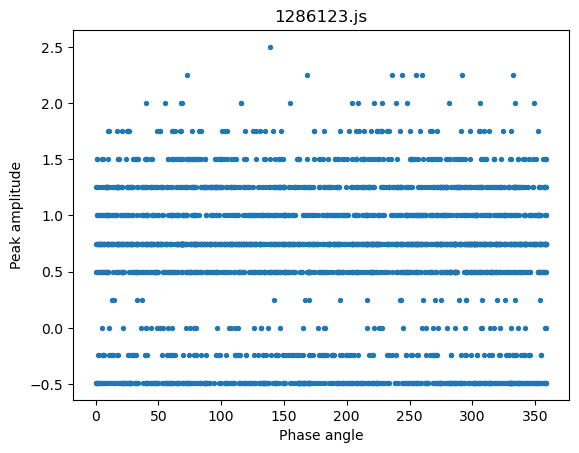

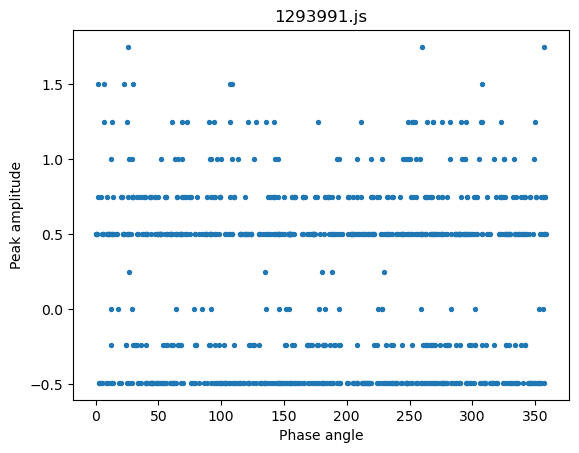

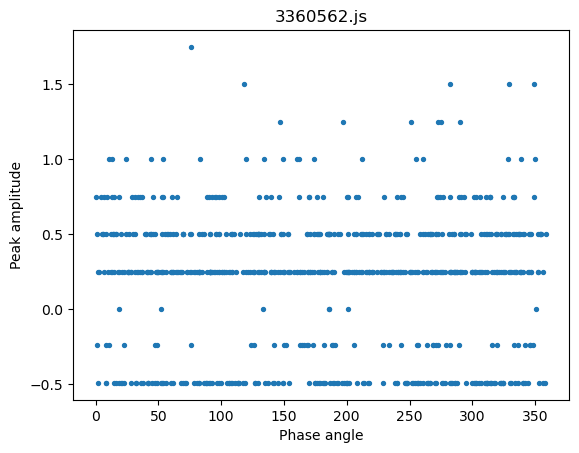

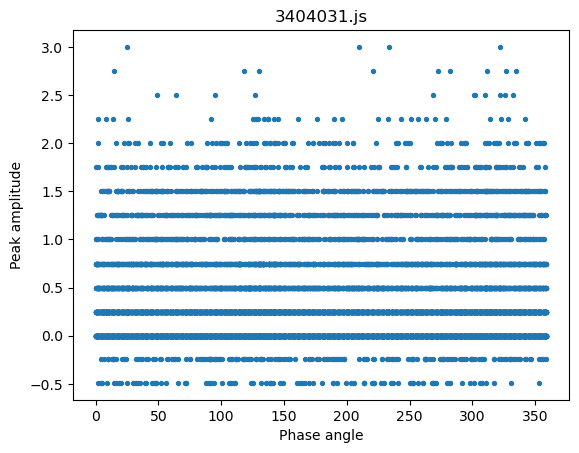

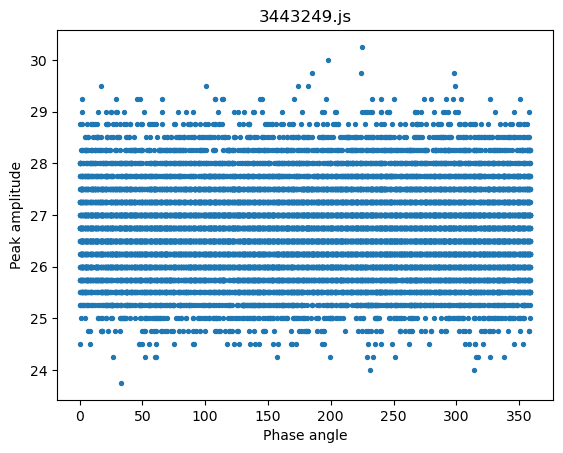

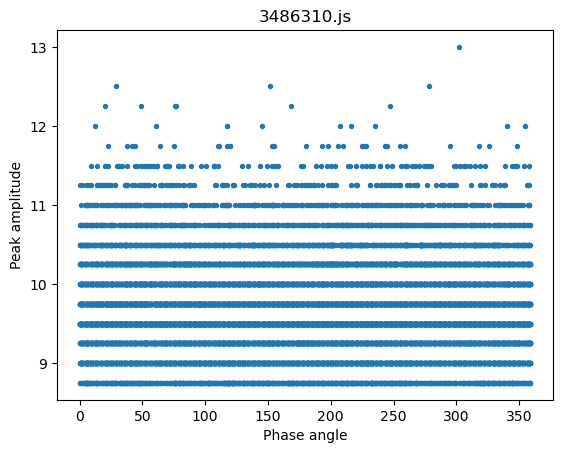

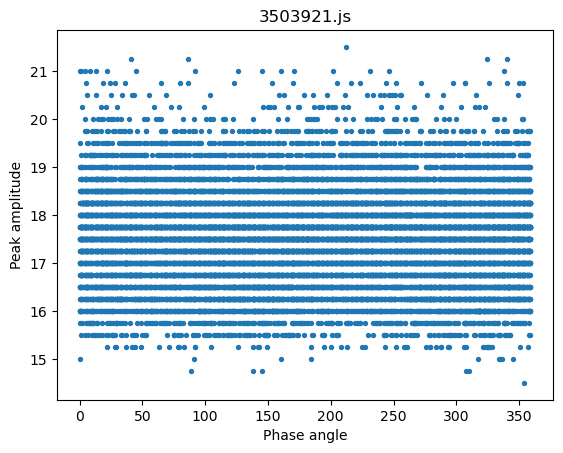

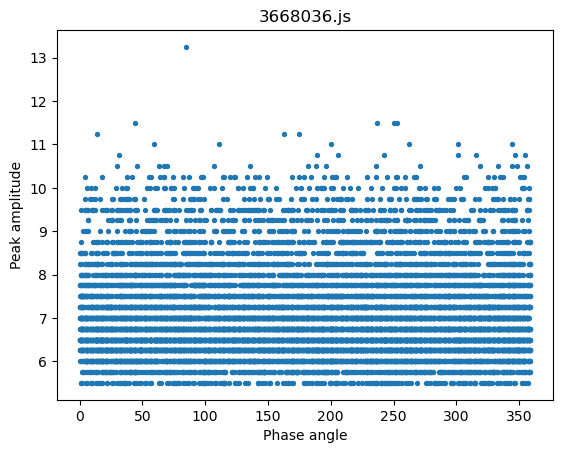

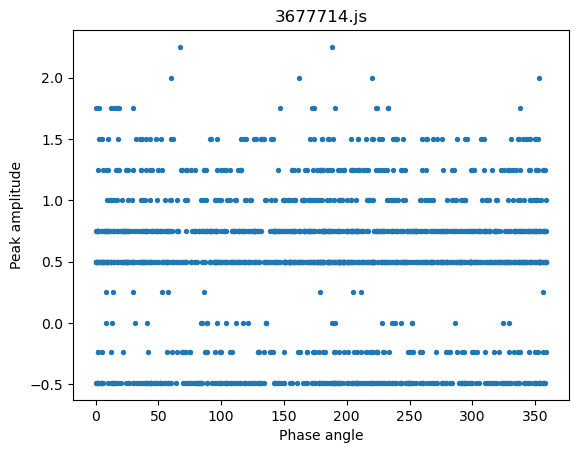

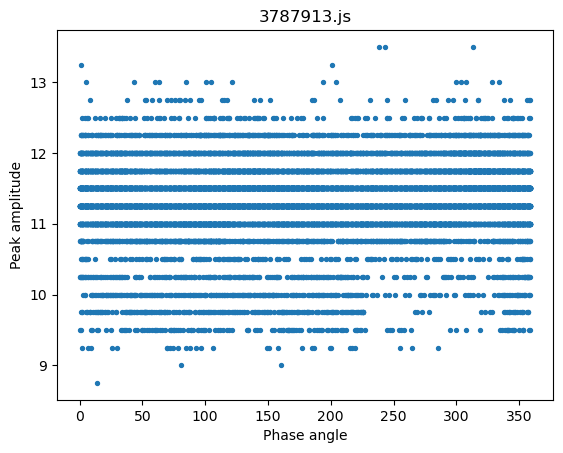

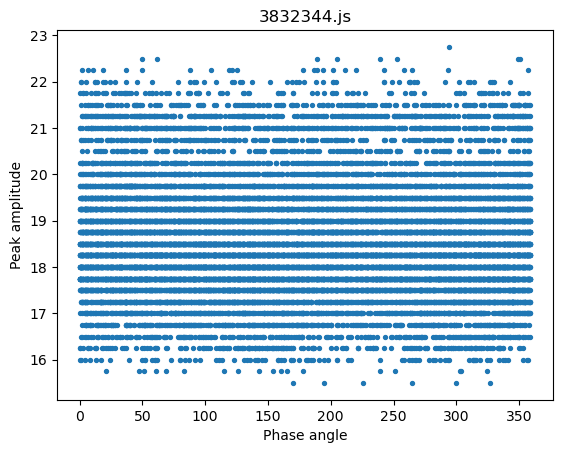

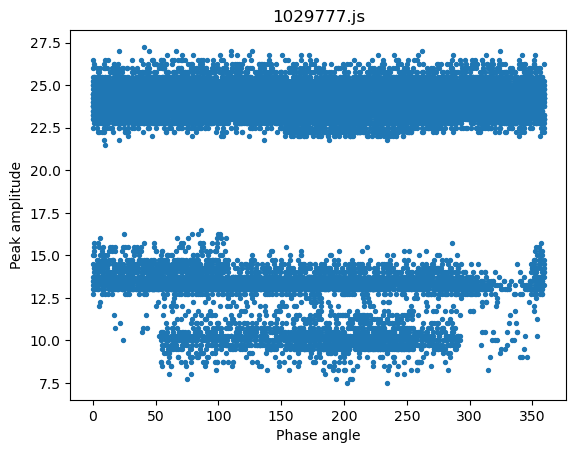

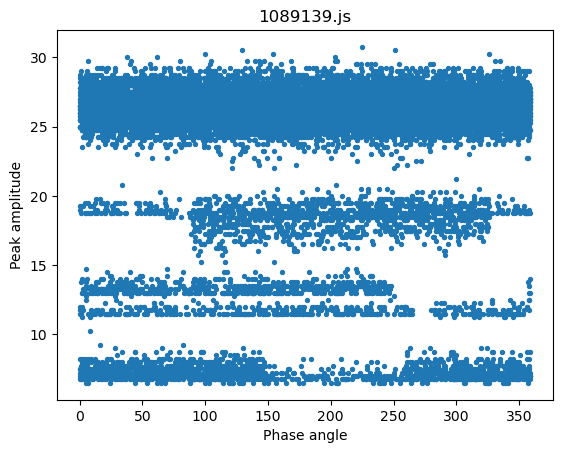

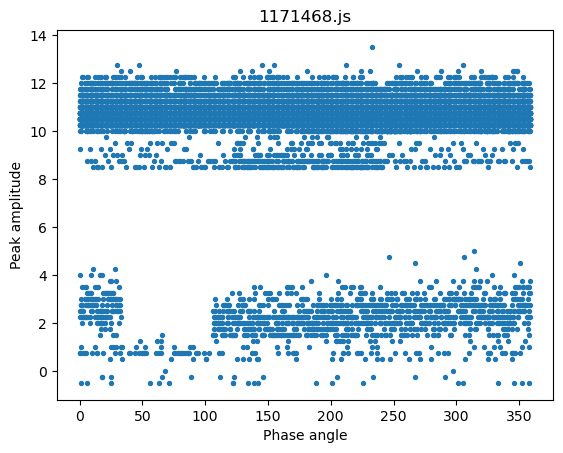

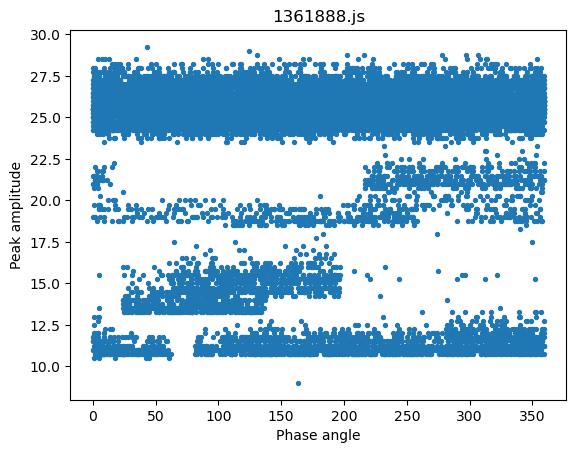

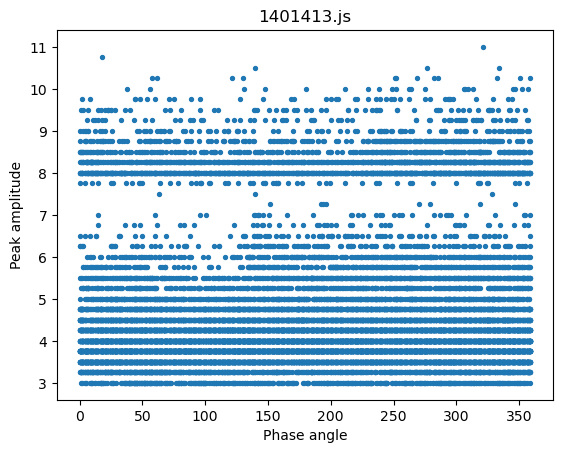

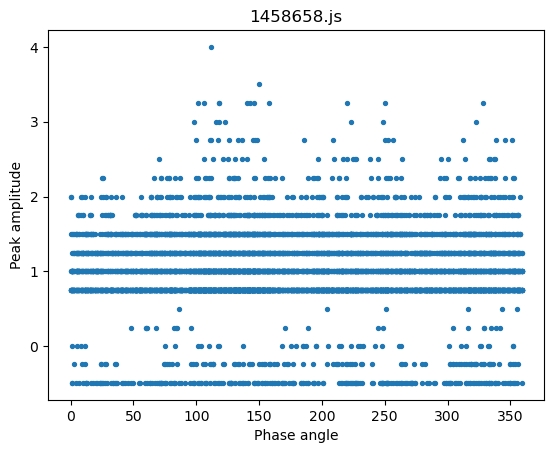

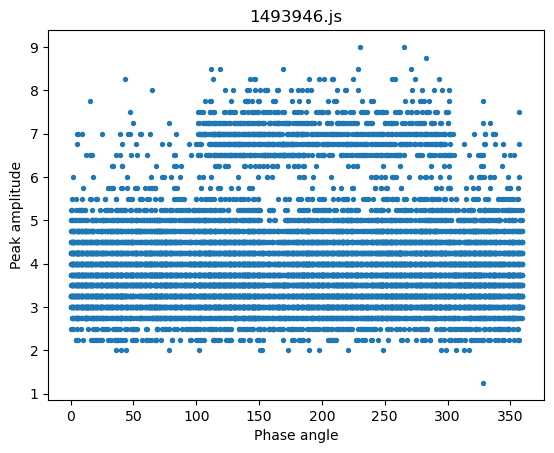

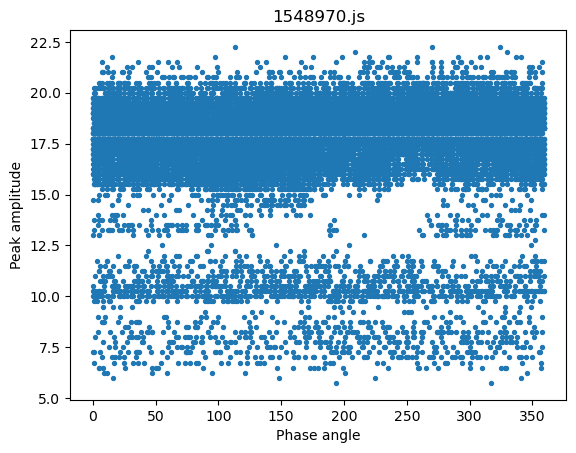

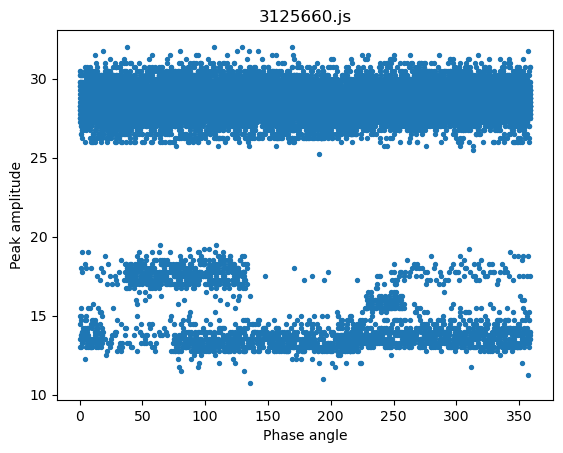

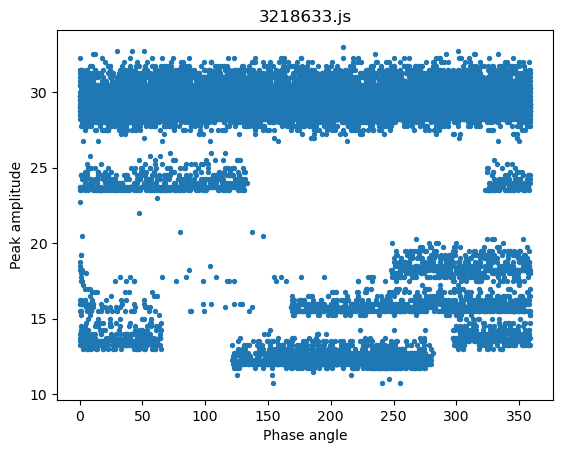

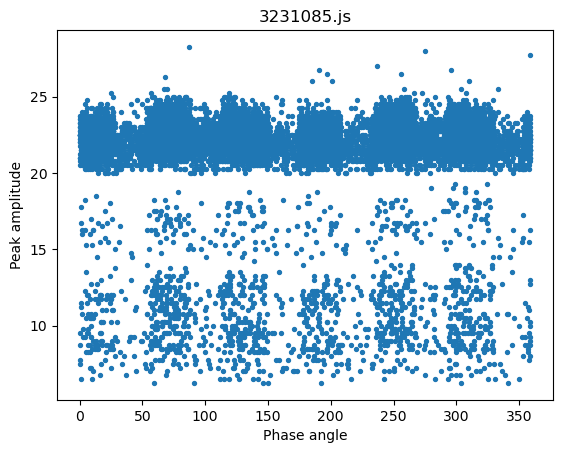

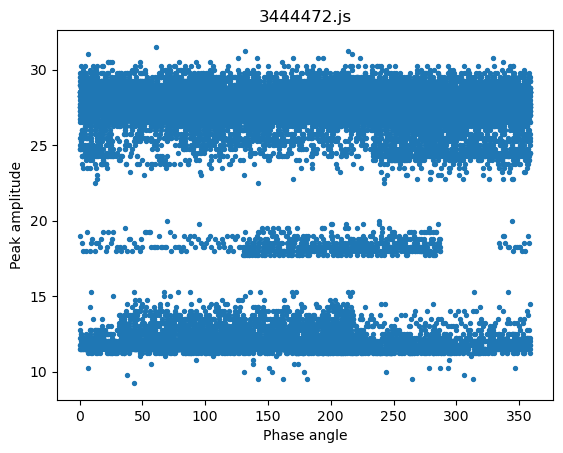

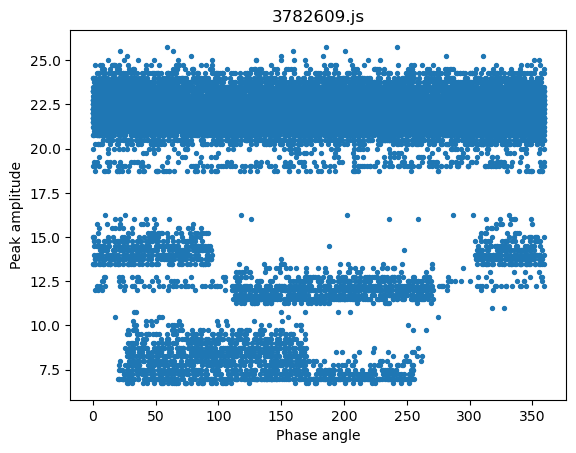

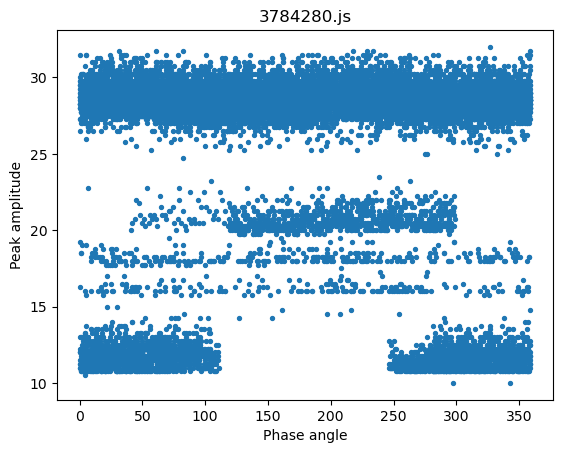

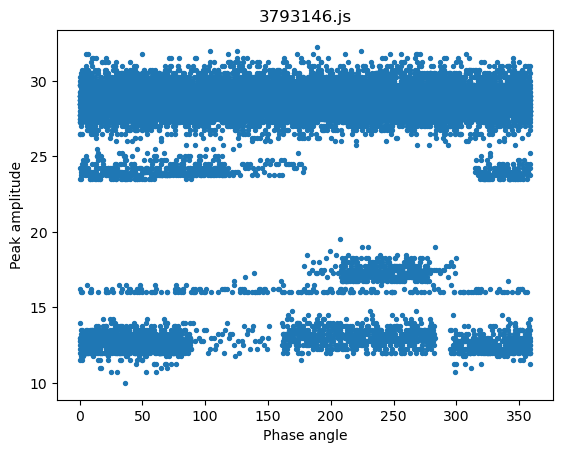

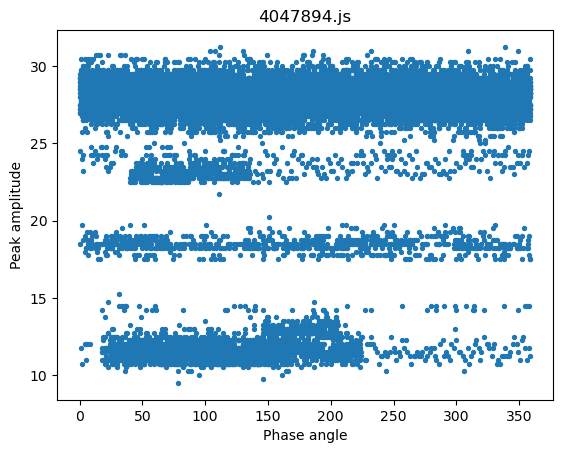

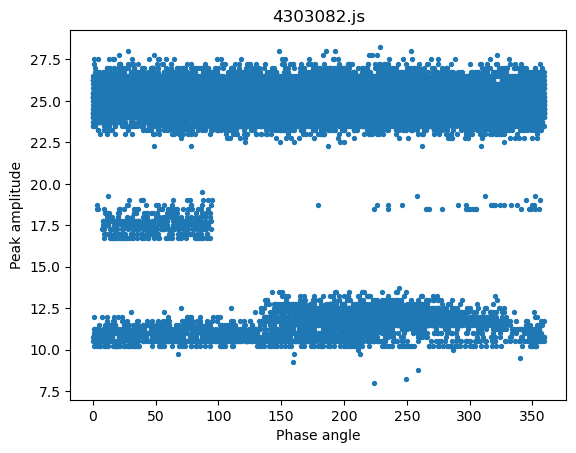

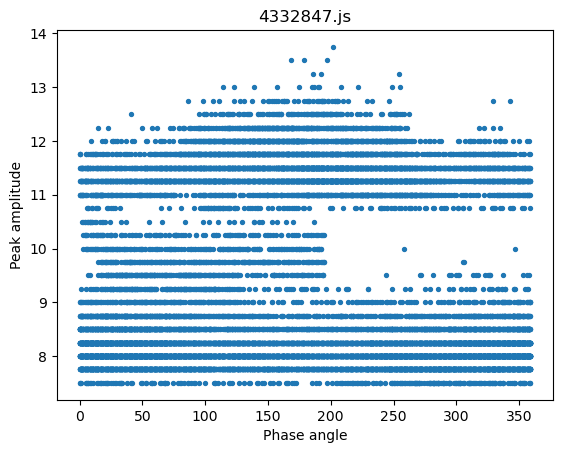

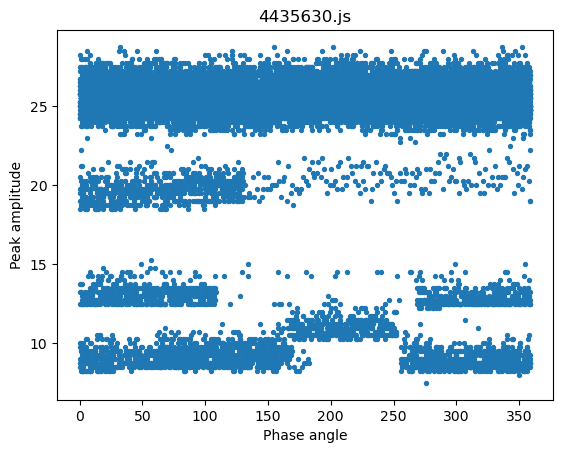

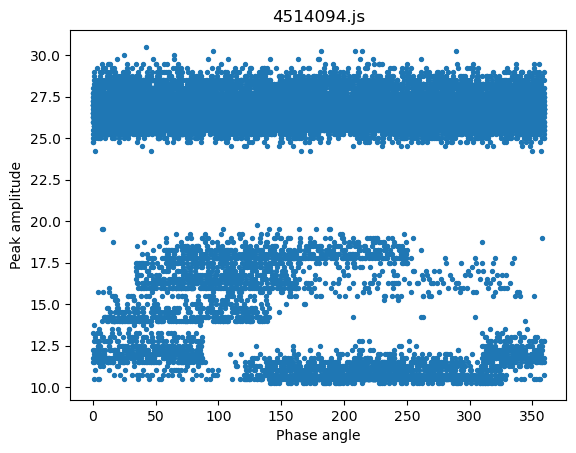

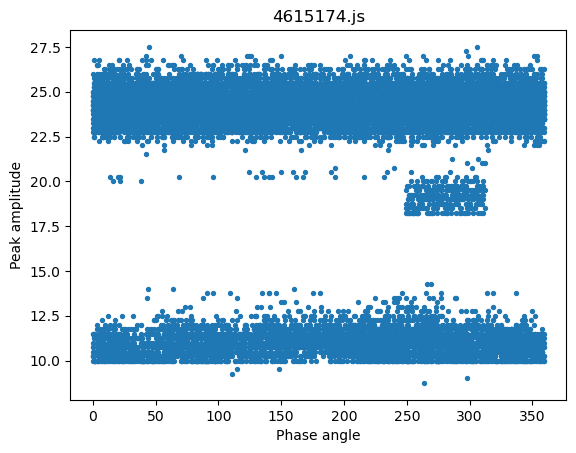

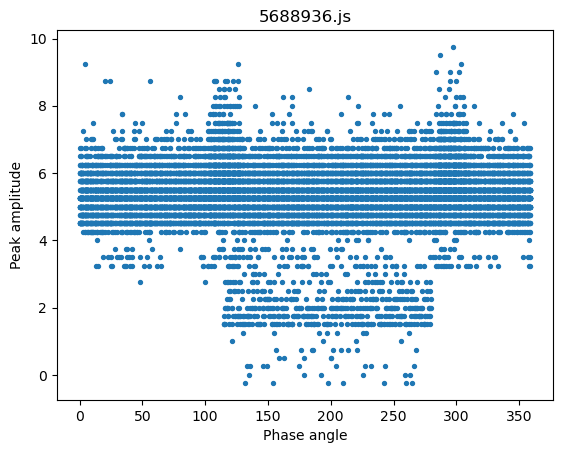

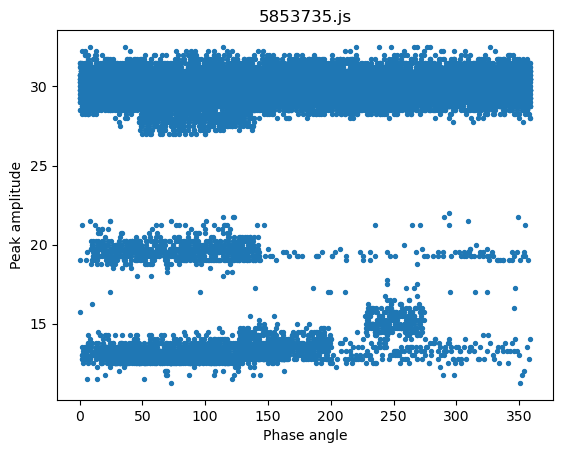

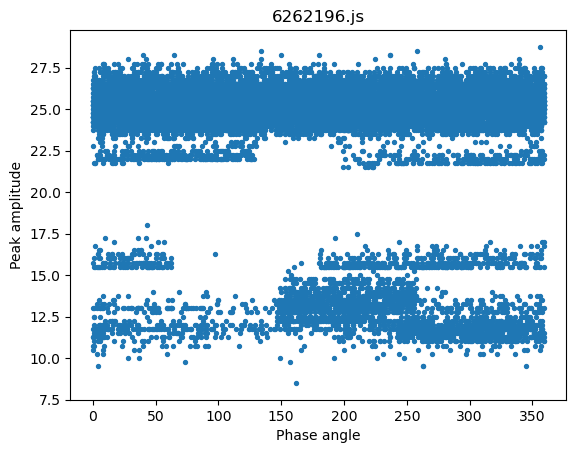

In [9]:
for dataframe in dataframes: # show data into plots
    plt.scatter(dataframe['phase_angle'], dataframe['peak_amplitude'], s=8)
    plt.title(dataframe['filename'].iloc[0])
    plt.xlabel('Phase angle')
    plt.ylabel('Peak amplitude')
    plt.show()

In [10]:
print(dataframes[1])


       peak_amplitude  integral  phase_angle  cycle_number  rise_time  \
0                3.00      1381          314         14019         17   
1                2.25      3227          315         14019         19   
2                2.25      2651          316         14019         17   
3                2.75      1601          317         14019          0   
4                3.25      1615          318         14019         48   
...               ...       ...          ...           ...        ...   
15501            1.50    -23367          338         14509          0   
15502            2.50     -7968          338         14509          0   
15503            2.25     -3693          338         14509        210   
15504            2.25    -13520          338         14509          0   
15505            2.00     -9817          339         14509          0   

       pulse_width    filename  anomaly  
0               20  1051807.js        1  
1               19  1051807.js        1

In [11]:
unique_files = set()

for df in dataframes:
    unique_files = unique_files.union(set(df['filename'].unique()))

print(unique_files)

{'1169299.js', '1089139.js', '1064265.js', '1276920.js', '1001948.js', '1286123.js', '1047582.js', '1238382.js', '4332847.js', '1056759.js', '1436233.js', '3125660.js', '1015896.js', '1493946.js', '1486626.js', '3787913.js', '1428713.js', '3784280.js', '1085956.js', '1494273.js', '1313587.js', '1044434.js', '3444472.js', '1159346.js', '1548970.js', '1169150.js', '1244284.js', '1025150.js', '1029777.js', '4514094.js', '1167250.js', '1283695.js', '3231085.js', '1416320.js', '1463420.js', '1054130.js', '3677714.js', '3404031.js', '3443249.js', '4047894.js', '1055262.js', '1161850.js', '3486310.js', '1401413.js', '1018183.js', '3218633.js', '1034768.js', '4615174.js', '3832344.js', '5853735.js', '5688936.js', '1020314.js', '1521771.js', '1051807.js', '1220019.js', '3782609.js', '3668036.js', '1208807.js', '1458658.js', '1049661.js', '1027092.js', '1230176.js', '1017547.js', '1275278.js', '4435630.js', '4303082.js', '1001263.js', '1032494.js', '1055093.js', '1059731.js', '3503921.js', '1171

In [12]:
print(dataframes[1])

       peak_amplitude  integral  phase_angle  cycle_number  rise_time  \
0                3.00      1381          314         14019         17   
1                2.25      3227          315         14019         19   
2                2.25      2651          316         14019         17   
3                2.75      1601          317         14019          0   
4                3.25      1615          318         14019         48   
...               ...       ...          ...           ...        ...   
15501            1.50    -23367          338         14509          0   
15502            2.50     -7968          338         14509          0   
15503            2.25     -3693          338         14509        210   
15504            2.25    -13520          338         14509          0   
15505            2.00     -9817          339         14509          0   

       pulse_width    filename  anomaly  
0               20  1051807.js        1  
1               19  1051807.js        1

In [13]:
def determine_baseline(bucket_data, kmeans, predicted_clusters, threshold=5):
    centroids = kmeans.cluster_centers_
    centroid_distance = abs(centroids[1] - centroids[0])

    if centroid_distance > threshold:
        # Clusters far apart - Outcome 1
        lower_centroid_index = np.argmin(centroids)
        lower_cluster = bucket_data[predicted_clusters == lower_centroid_index]
        return max(lower_cluster['peak_amplitude'])
    else:
        # Clusters close together - Outcome 2
        higher_centroid_index = np.argmax(centroids)
        return centroids[higher_centroid_index][0]

In [14]:
def denoise_dataframes(dataframes):
    warnings.filterwarnings('ignore')
    for df in dataframes:
        # if df['peak_amplitude'].max() > 8: # filter out the negative
        #     continue

        # Bucket phase angles
        df['bucket'] = pd.cut(df['phase_angle'], bins=range(0, 361, 10), labels=False)

        # Perform k-means clustering on each bucket and determine baselines
        kmeans_results = []
        bucket_baselines = []
        for i in range(36):
            bucket_data = df[df['bucket'] == i]
            if not bucket_data.empty and len(bucket_data) > 1:
                kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
                kmeans.fit(bucket_data['peak_amplitude'].values.reshape(-1, 1))
                kmeans_results.append((i, kmeans))

                # Predict the clusters for bucket_data
                predicted_clusters = kmeans.predict(bucket_data['peak_amplitude'].values.reshape(-1, 1))

                # Pass the predicted clusters to the determine_baseline function
                baseline = determine_baseline(bucket_data, kmeans, predicted_clusters)
                bucket_baselines.append((i, baseline))
            else:
                kmeans_results.append((i, None))
                bucket_baselines.append((i, None))

        # Assign cluster labels to each data point
        df['cluster'] = np.nan
        for i, kmeans in kmeans_results:
            if kmeans is not None:
                mask = df['bucket'] == i
                df.loc[mask, 'cluster'] = kmeans.predict(df.loc[mask, 'peak_amplitude'].values.reshape(-1, 1))

        baselines = [baseline for _, baseline in bucket_baselines if baseline is not None]
        basemode = mode(baselines).mode[0]

        # Remove points below the baseline mode (inserted)
        df.loc[:, 'filtered'] = df['peak_amplitude'] >= basemode

        # # Scatter plot with bucketed phase angles and clustered data points
        # plt.scatter(df['phase_angle'], df['peak_amplitude'], c=df['cluster'], cmap='viridis', s=8)
        # plt.title(df['filename'].iloc[0])
        # plt.xlabel('Phase angle')
        # plt.ylabel('Peak amplitude')

        # # Plot baselines
        # for i, baseline in bucket_baselines:
        #     if baseline is not None:
        #         plt.hlines(baseline, i * 10, (i + 1) * 10 - 1, colors='r', linestyles='dashed')
        # plt.hlines(basemode, 0, 359, colors='b', linestyles='solid')
        # plt.show()

    return dataframes

In [15]:
dataframes = denoise_dataframes(dataframes)

In [16]:
print(dataframes[2])

       peak_amplitude  integral  phase_angle  cycle_number  rise_time  \
0                7.25      2040          214          1412          0   
1                6.75     -2831          224          1412          0   
2                7.75      3181          349          1412          0   
3                9.00      2953          349          1412          3   
4               10.00      2895          358          1412          1   
...               ...       ...          ...           ...        ...   
12210            8.00      2215          195          1912          0   
12211            7.50      2639          198          1912          0   
12212            6.25      2464          210          1912          0   
12213            9.25      4814          211          1912          0   
12214            6.75      1789          213          1912          0   

       pulse_width    filename  anomaly  bucket  cluster  filtered  
0                0  1054130.js        1    21.0      1

In [17]:
filtered_dataframes = [df[df['filtered'] == True] for df in dataframes]

In [18]:
print(filtered_dataframes[1])

       peak_amplitude  integral  phase_angle  cycle_number  rise_time  \
88               5.25      5618          359         14019          4   
277              5.75      6301          179         14020          6   
386              5.00      1512          293         14020         81   
396              4.75      2079          297         14020          0   
425             13.25     10931           20         14029         27   
...               ...       ...          ...           ...        ...   
15076            5.00     12290          278         14497        324   
15189            5.75      6239          359         14497         19   
15190            5.00      6267          359         14497         20   
15350            5.25      2227          356         14508          0   
15351            4.75    -11756          359         14508          0   

       pulse_width    filename  anomaly  bucket  cluster  filtered  
88              49  1051807.js        1    35.0      1

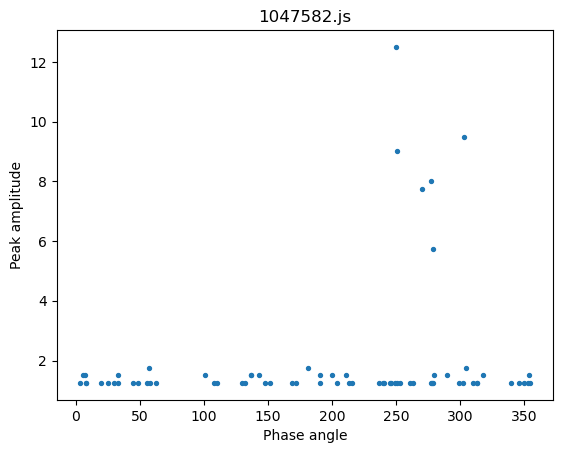

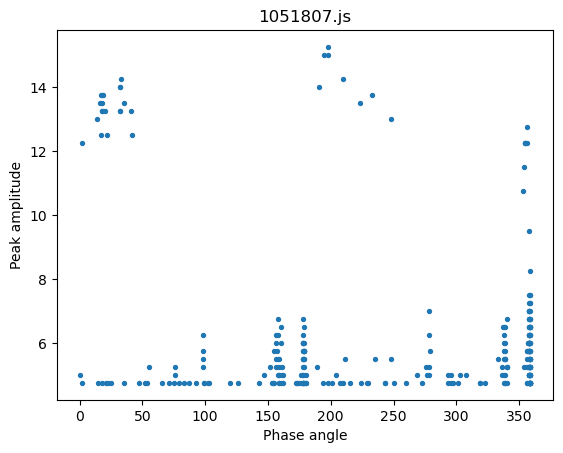

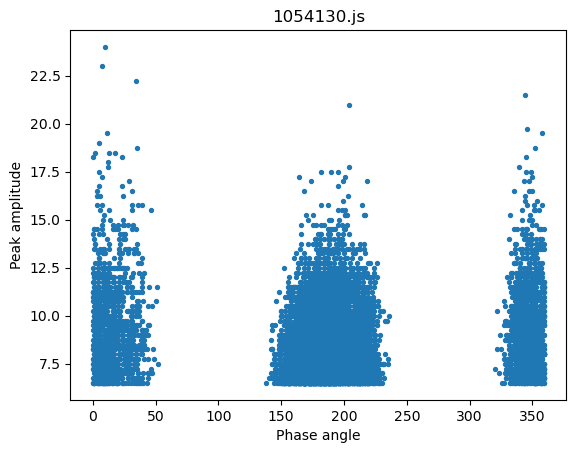

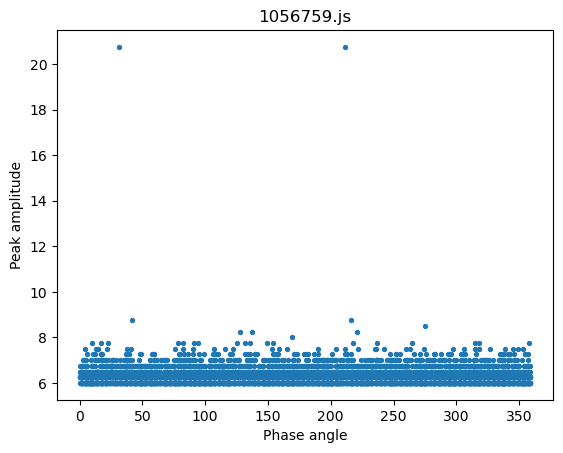

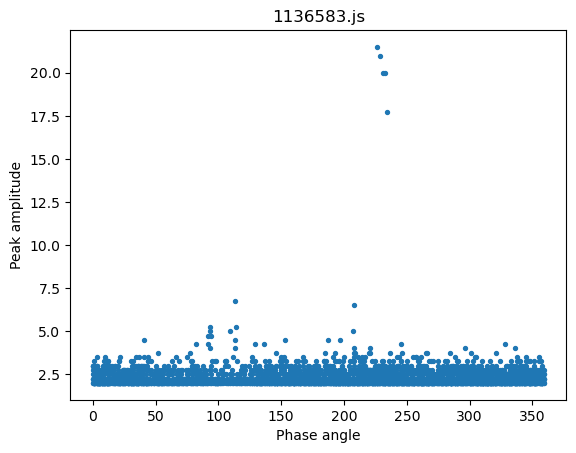

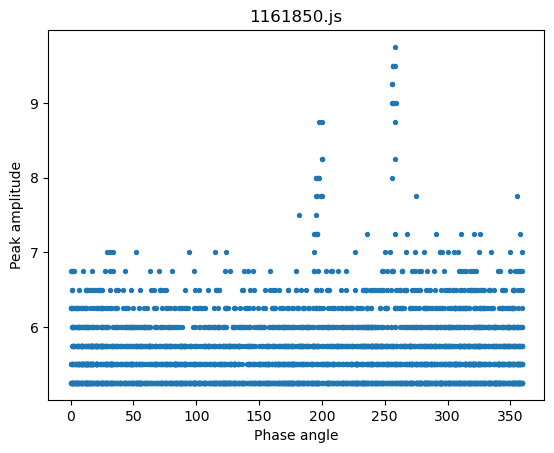

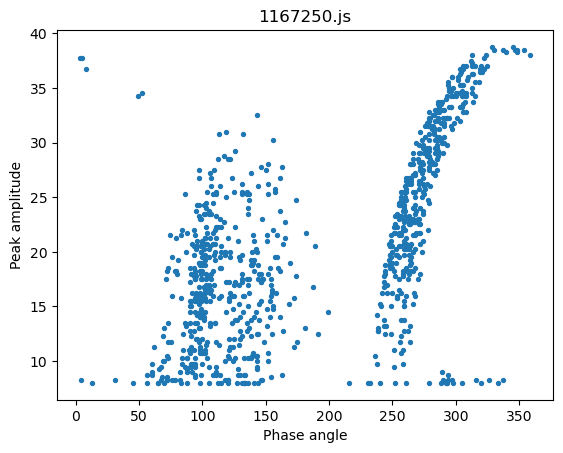

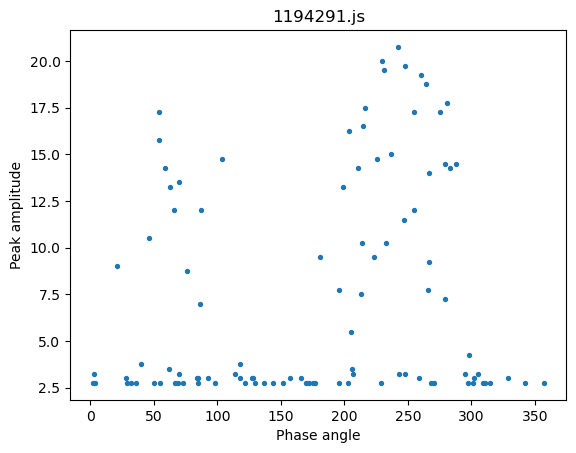

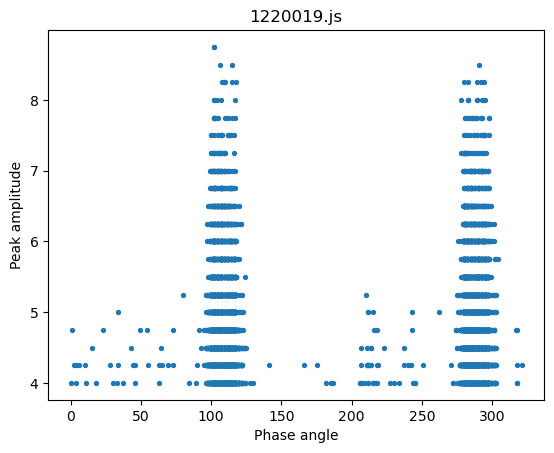

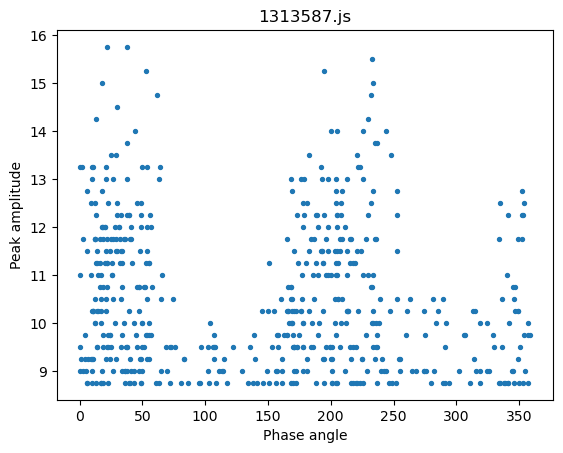

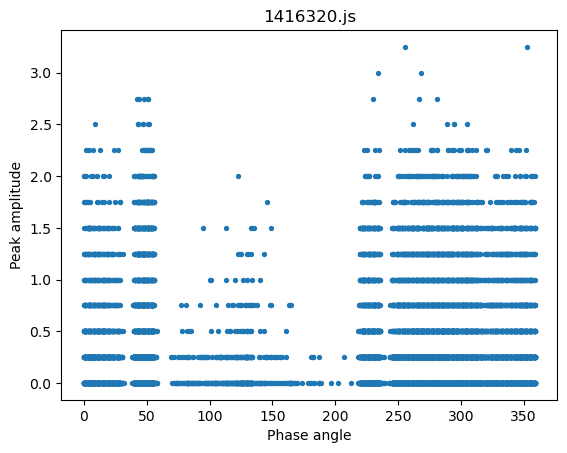

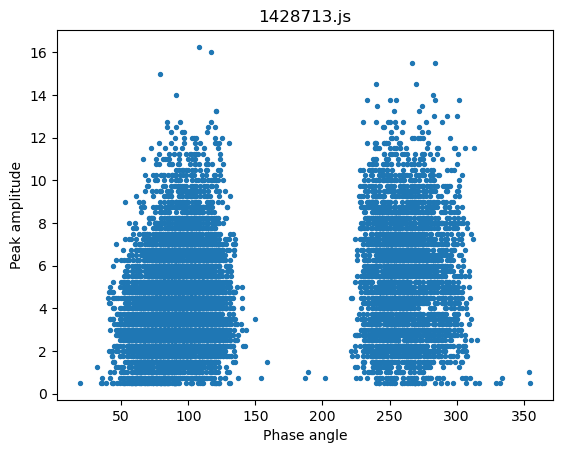

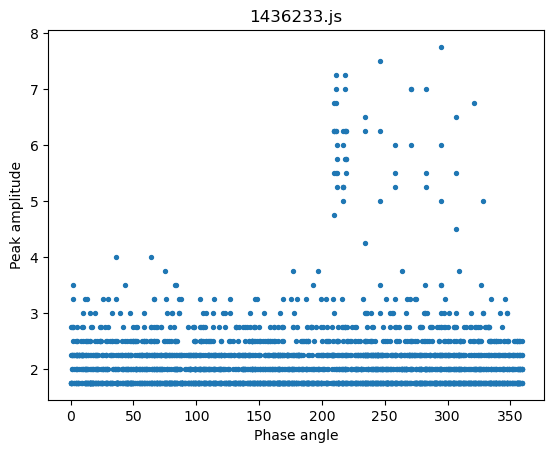

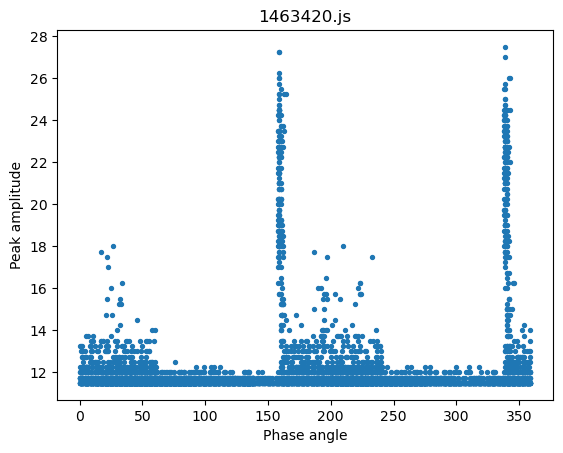

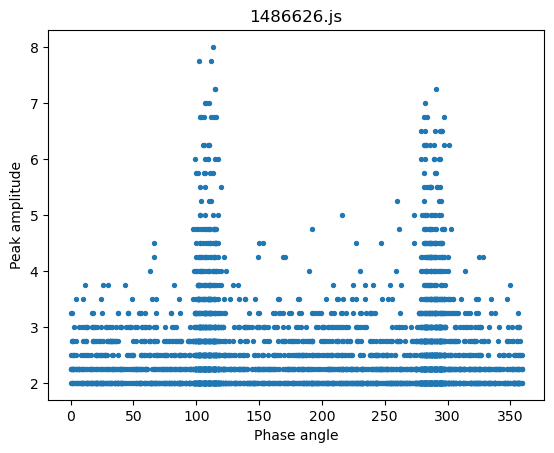

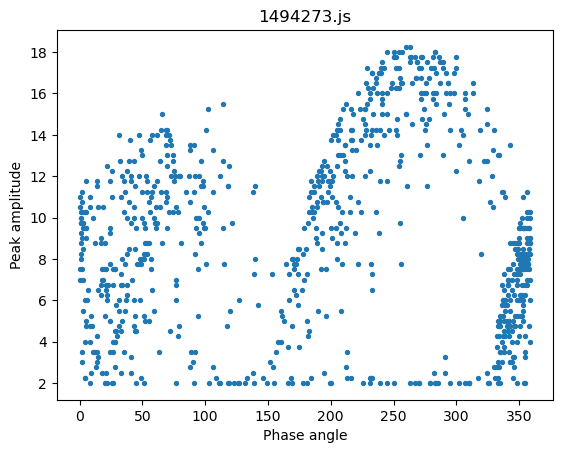

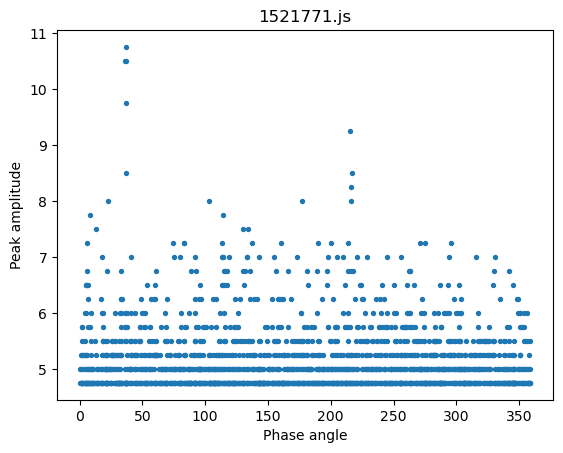

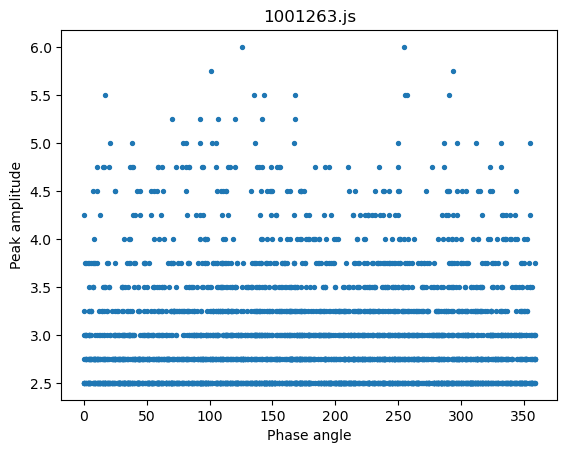

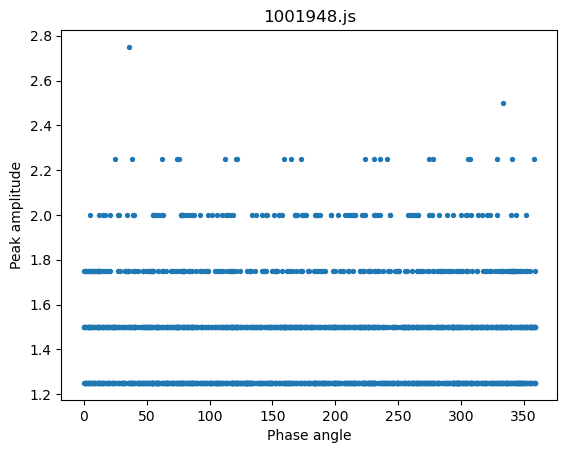

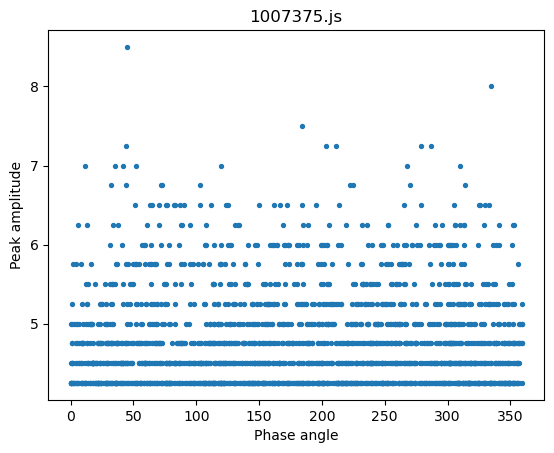

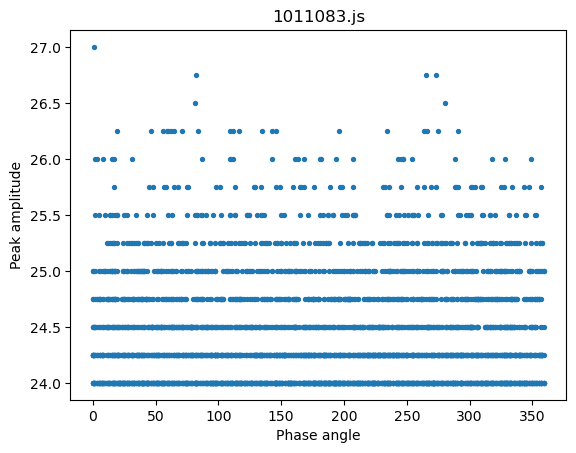

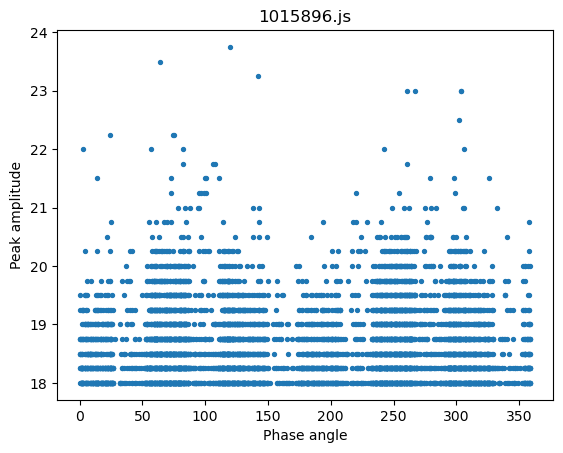

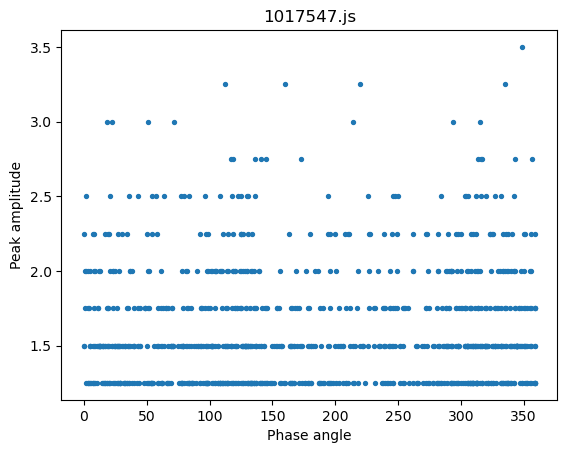

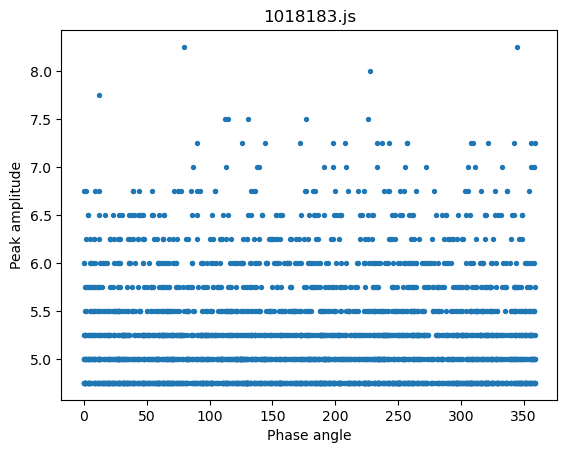

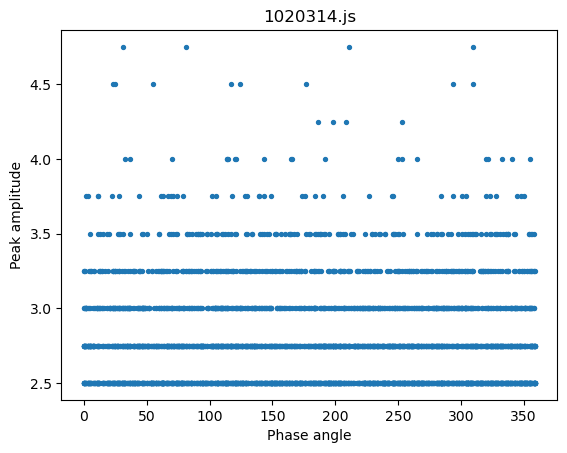

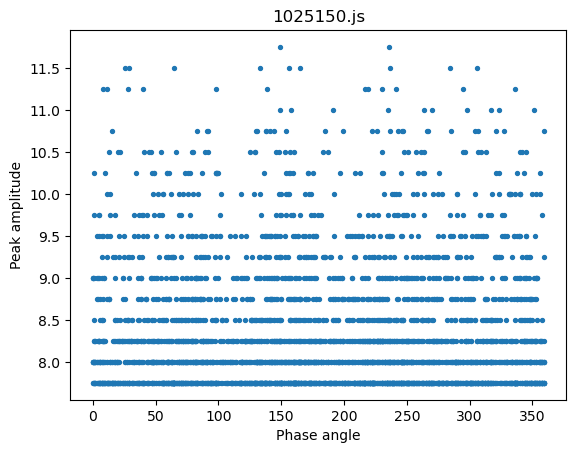

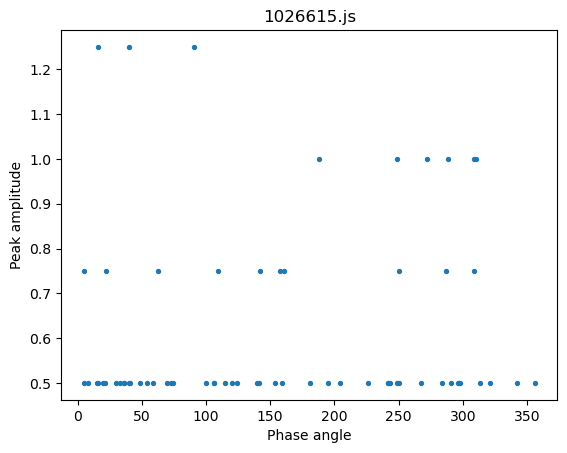

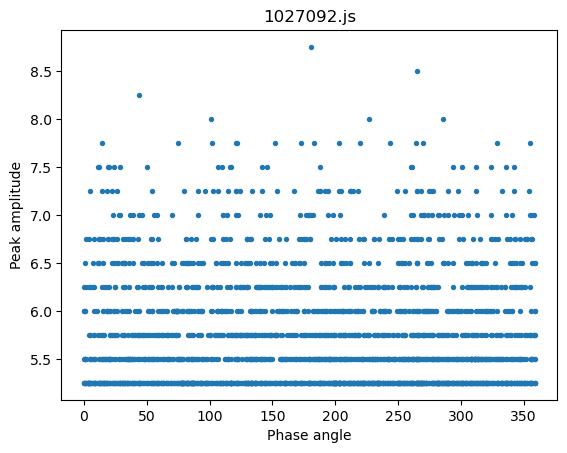

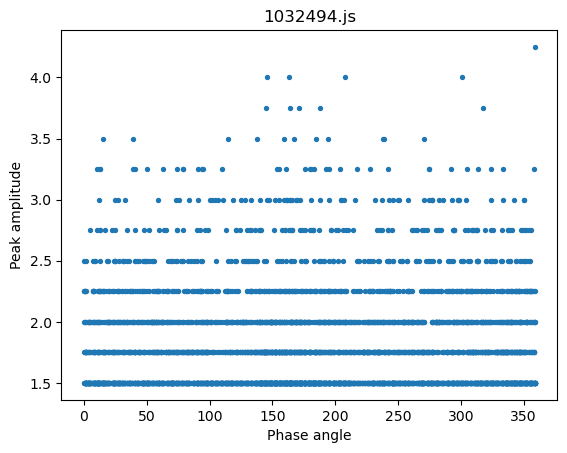

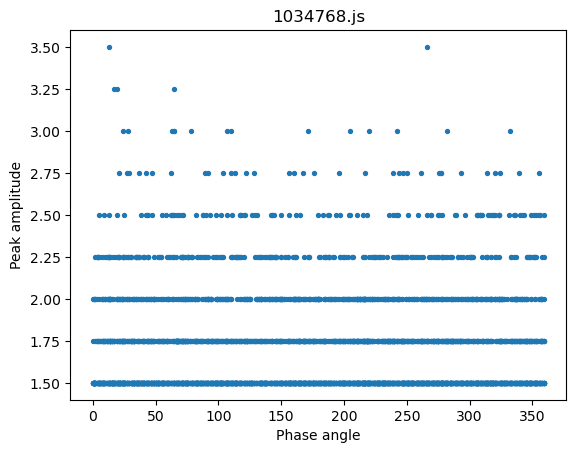

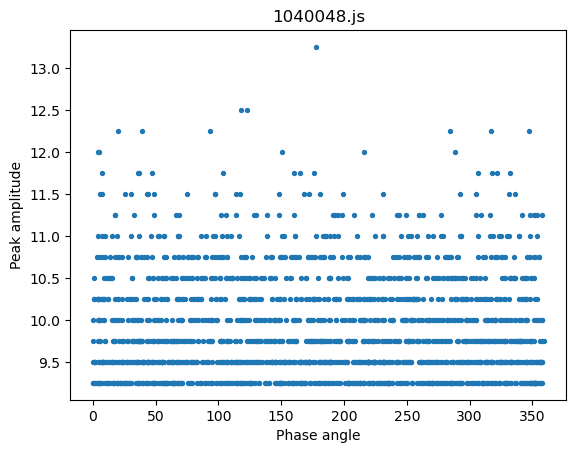

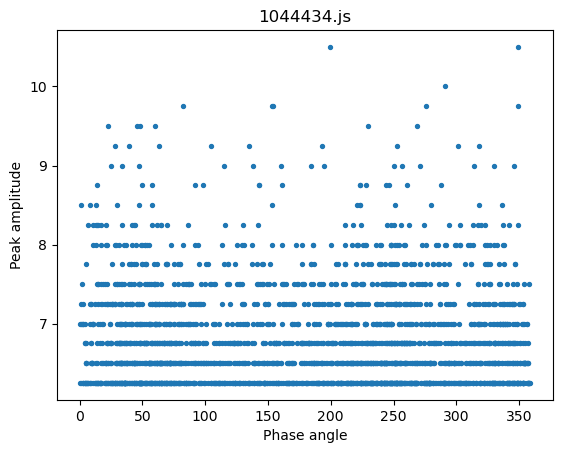

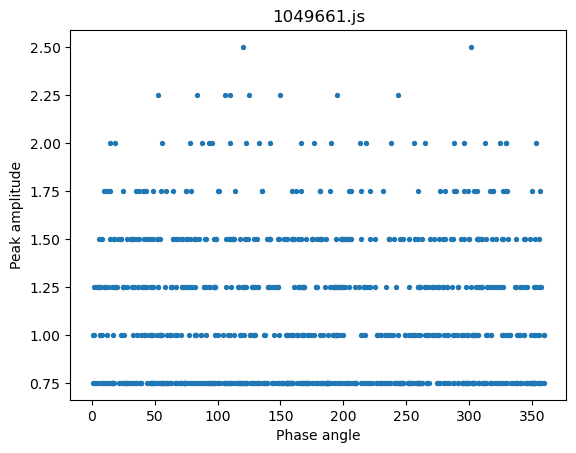

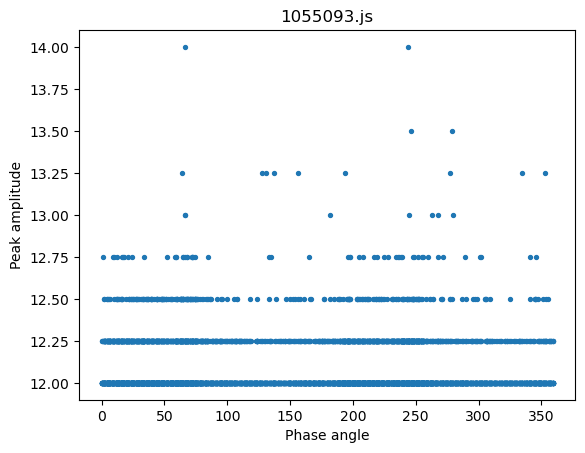

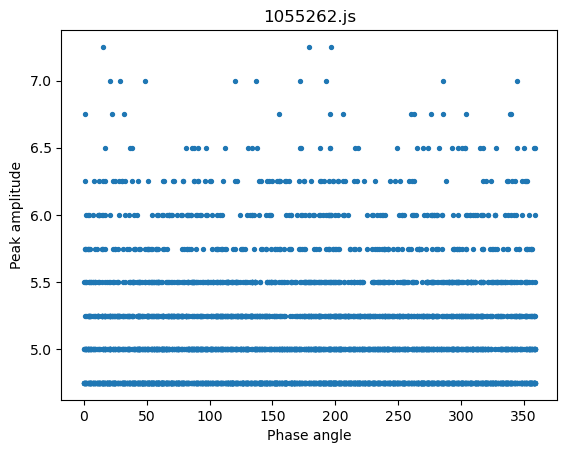

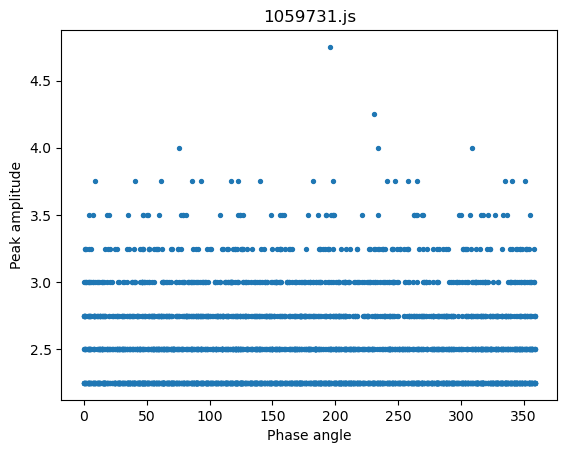

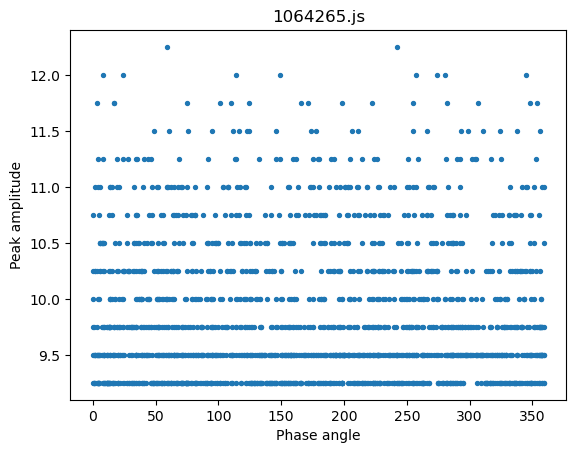

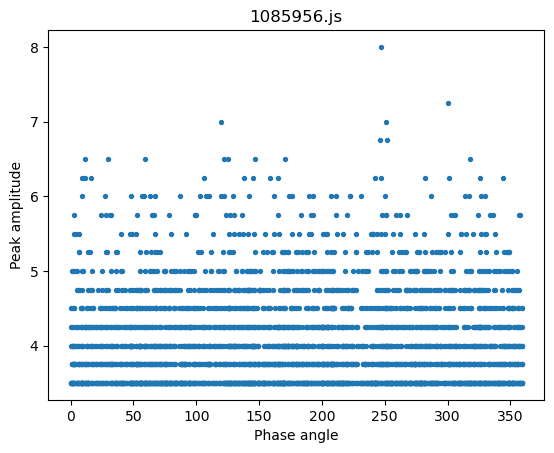

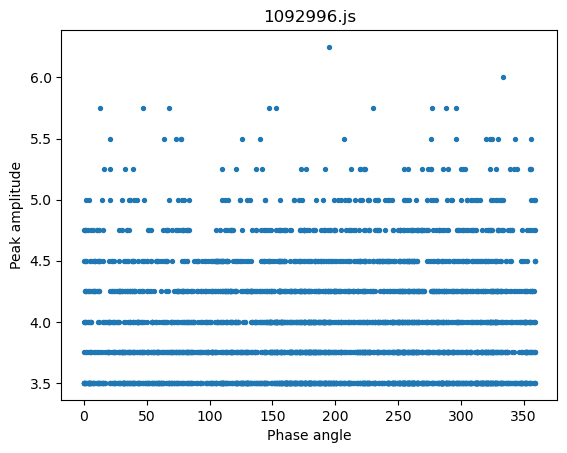

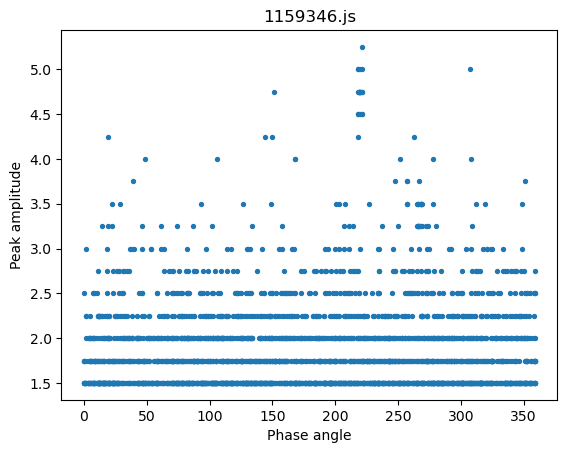

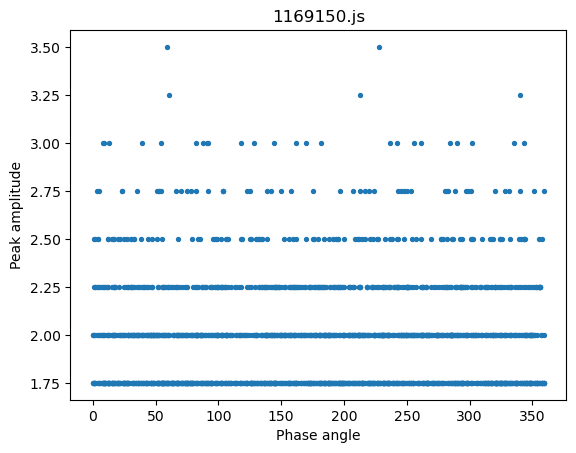

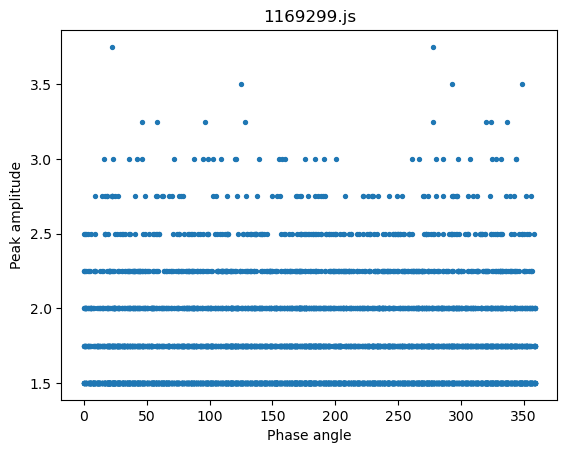

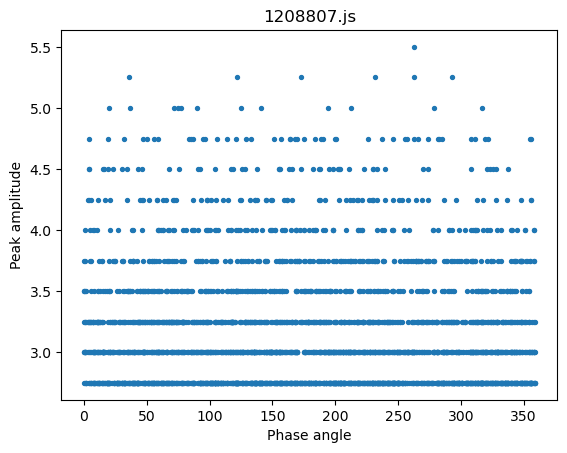

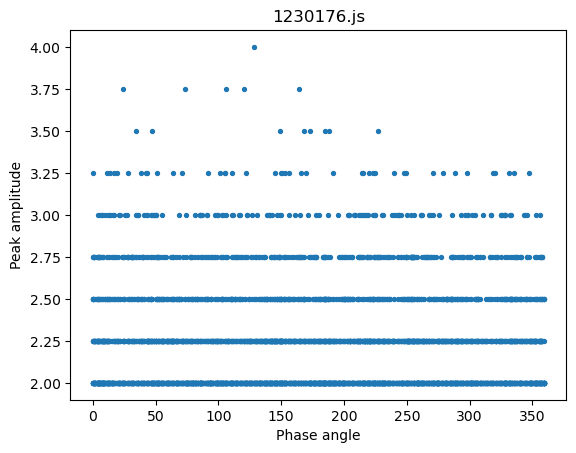

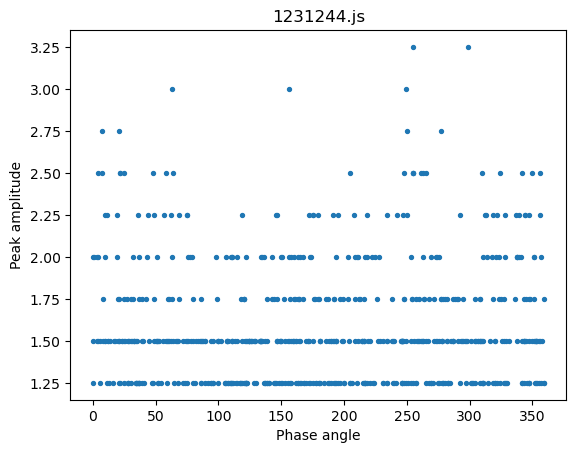

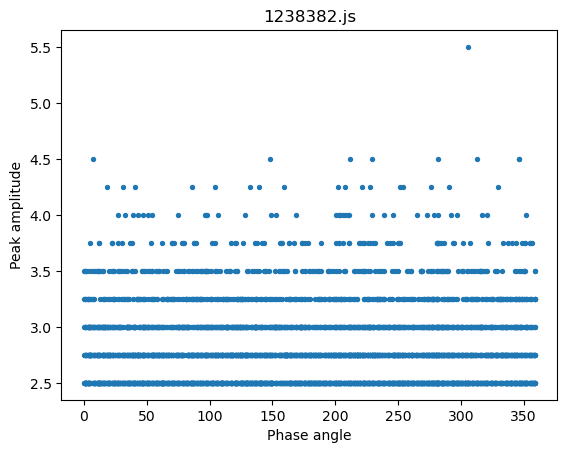

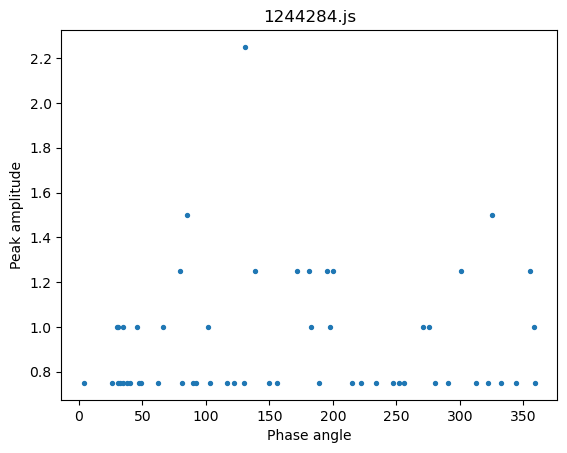

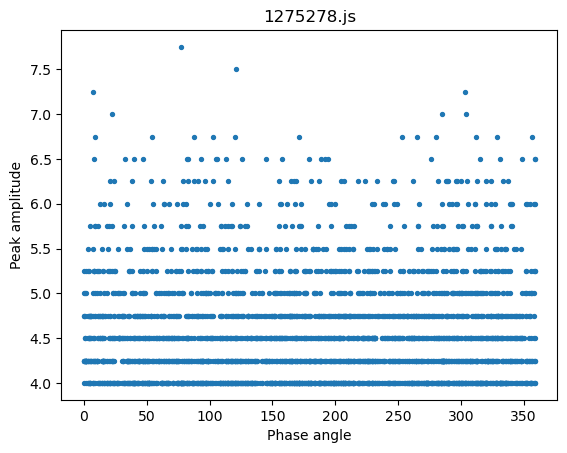

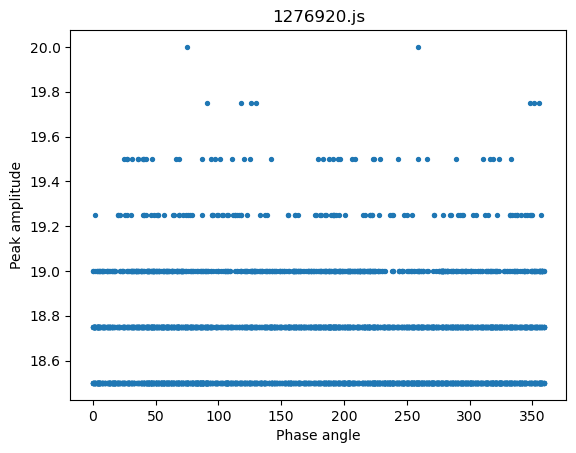

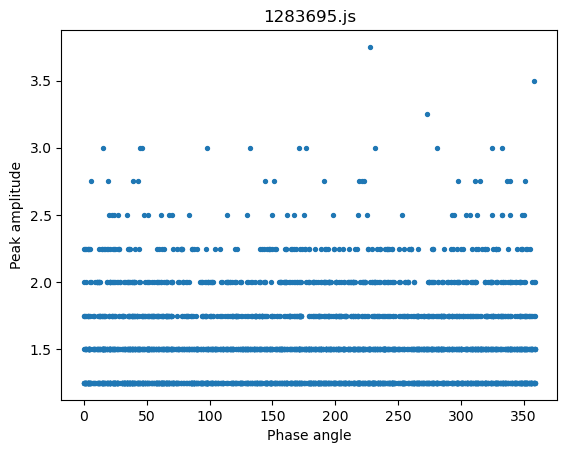

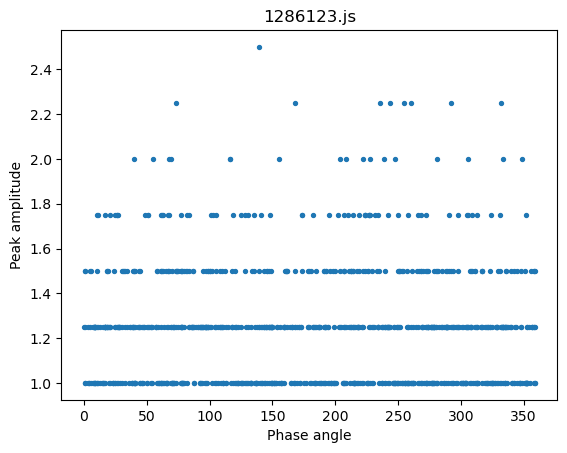

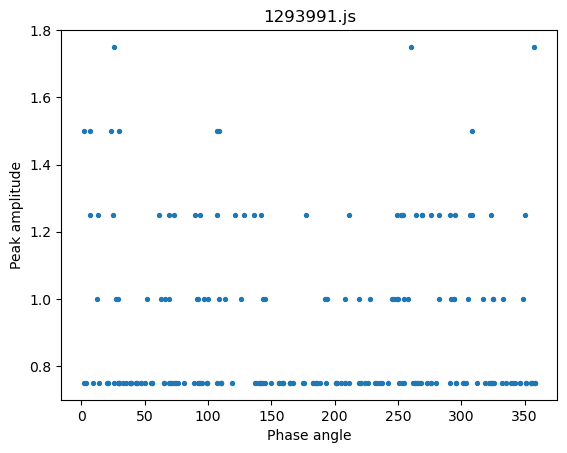

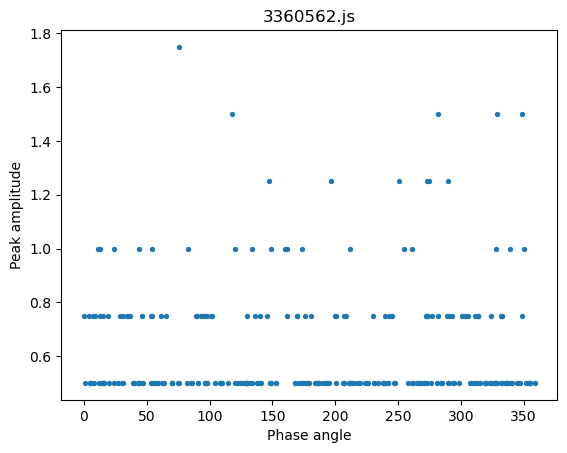

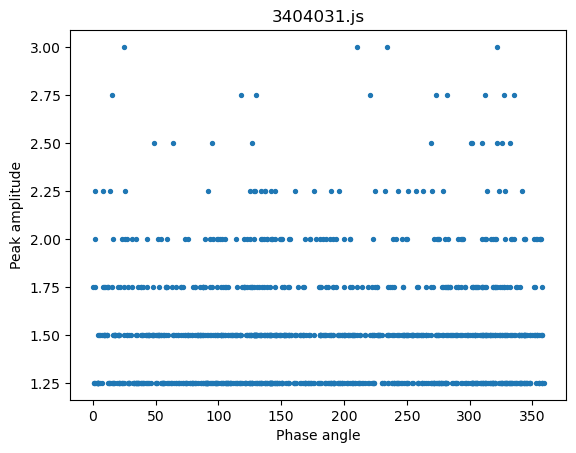

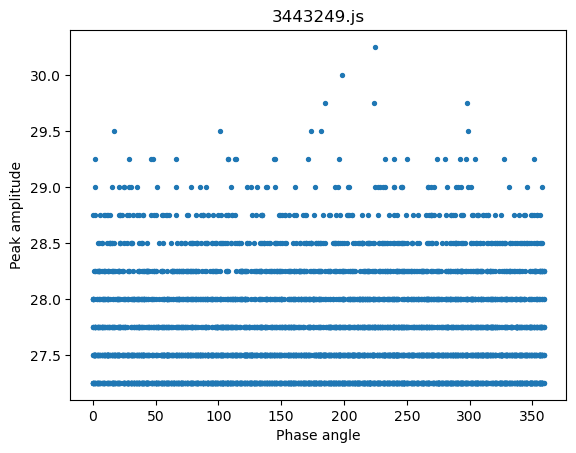

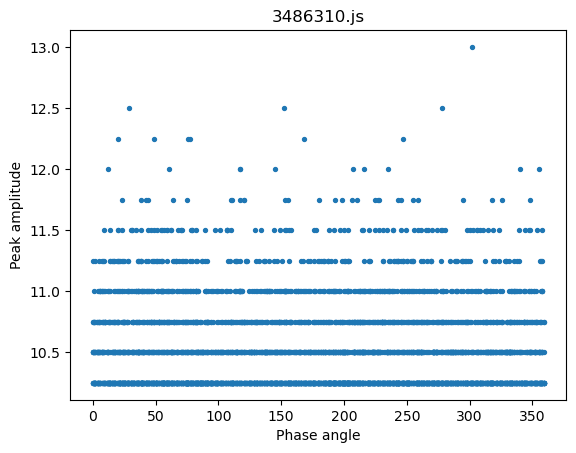

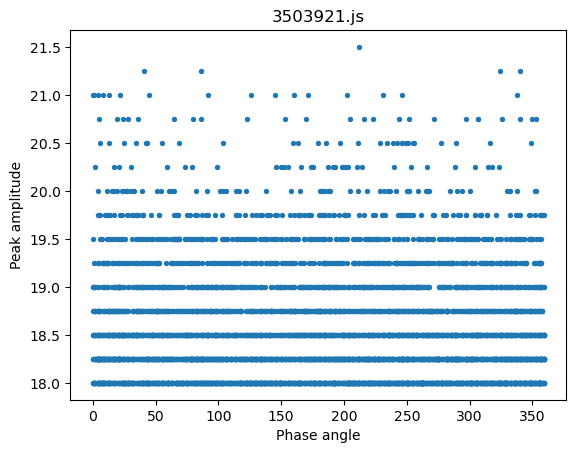

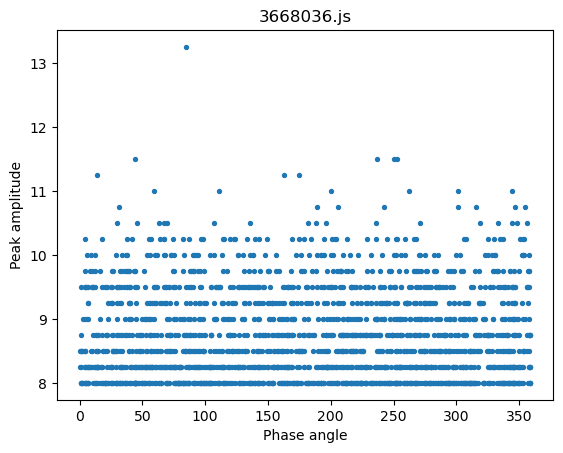

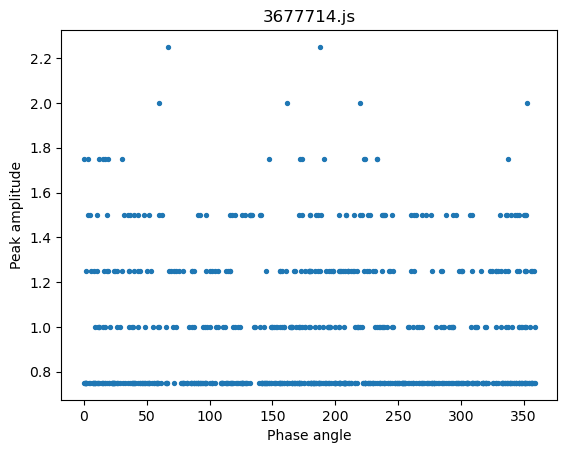

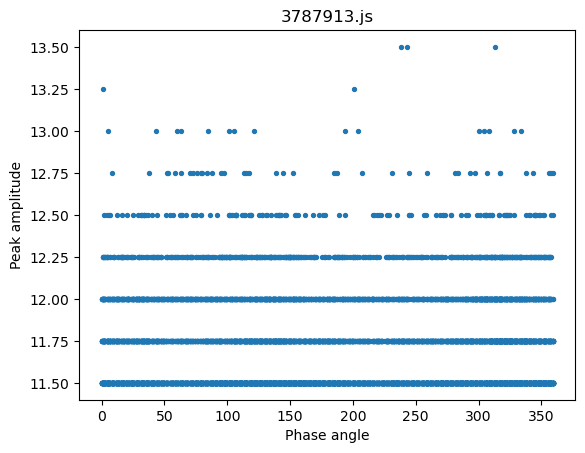

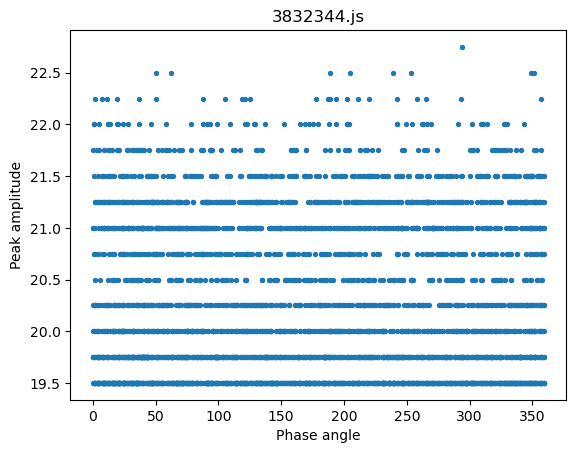

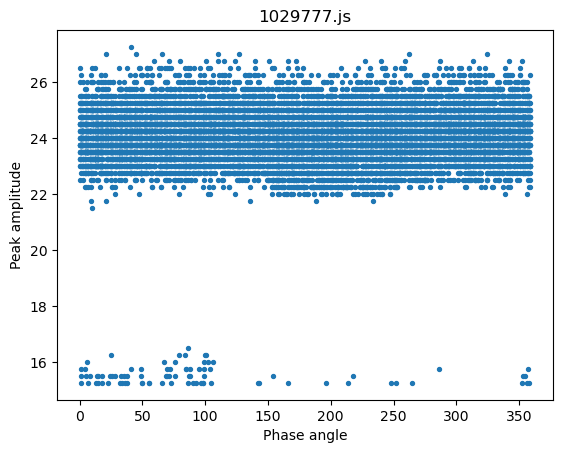

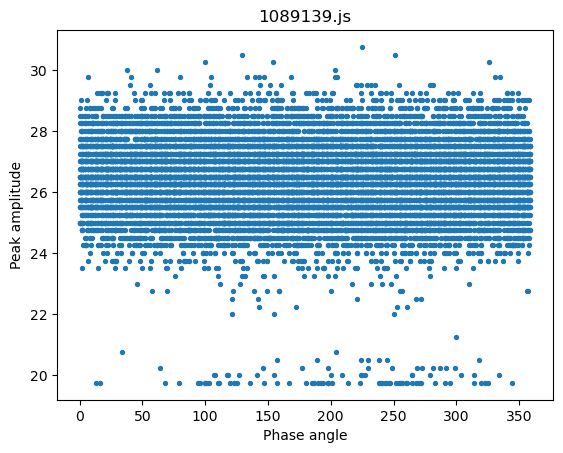

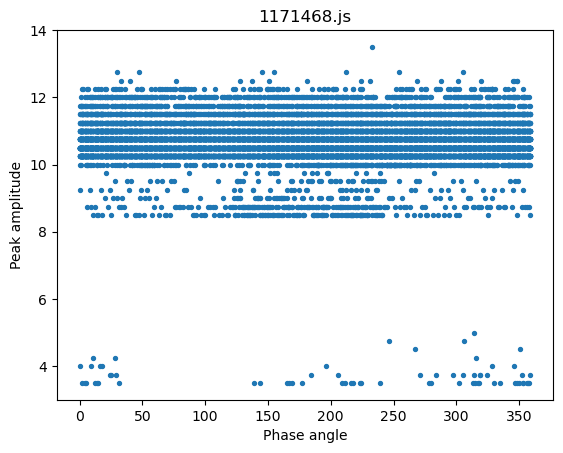

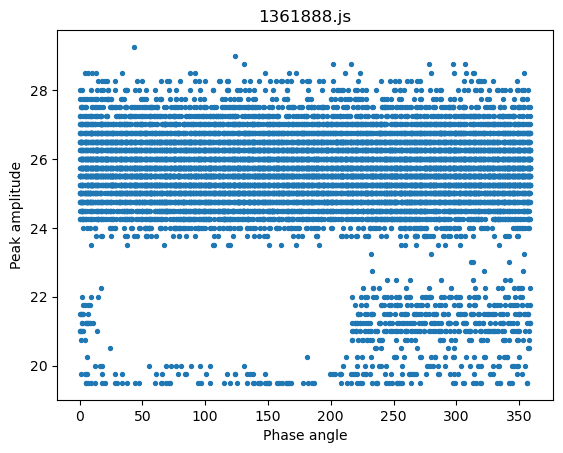

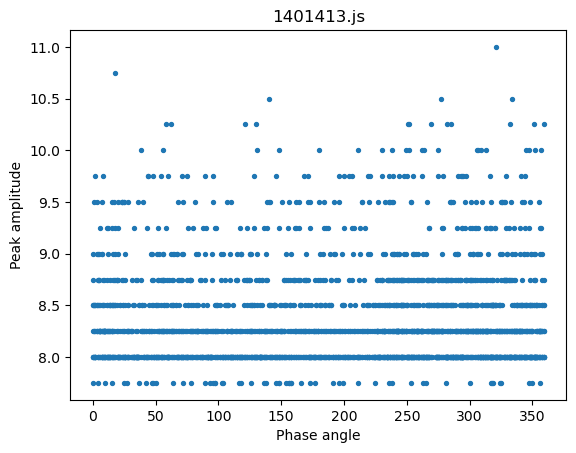

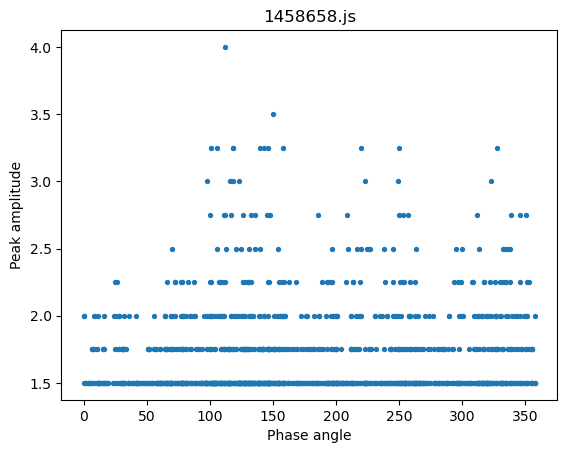

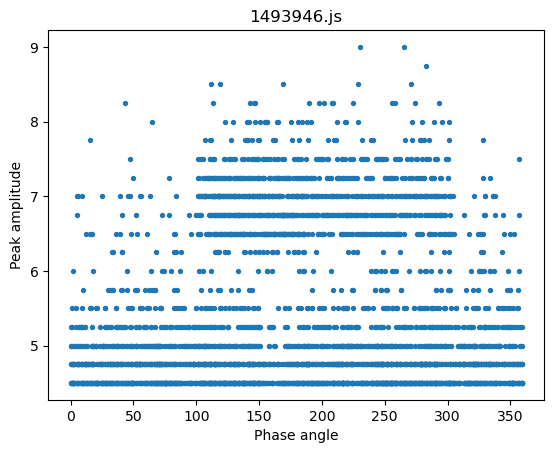

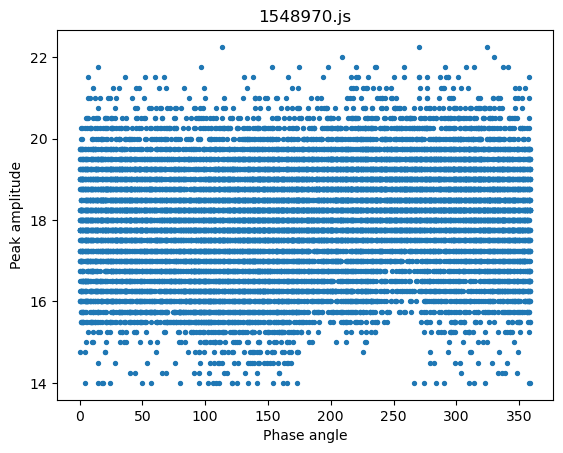

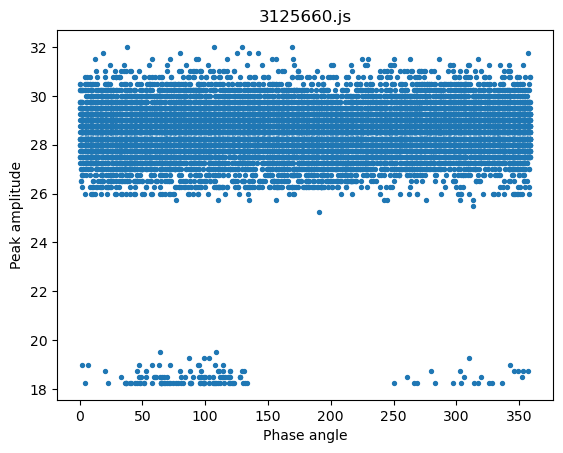

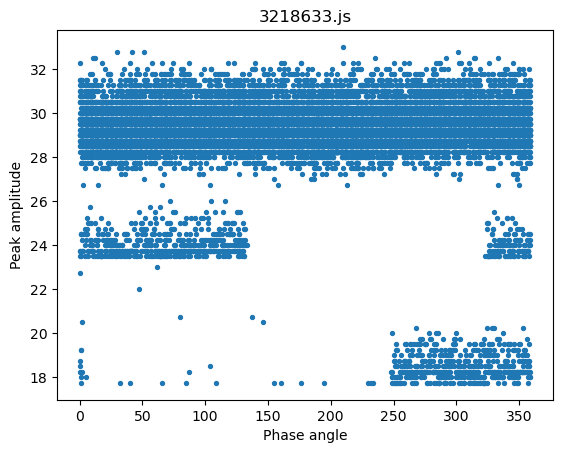

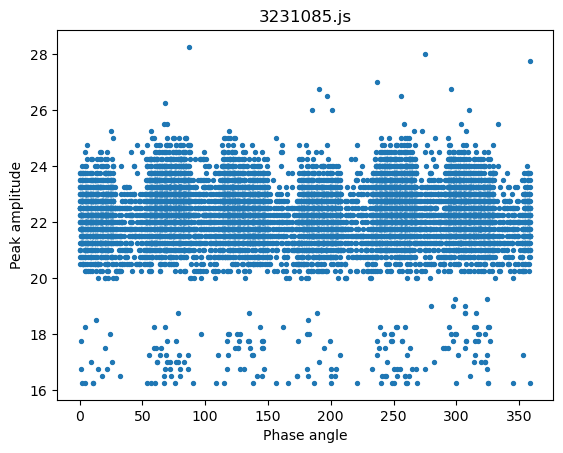

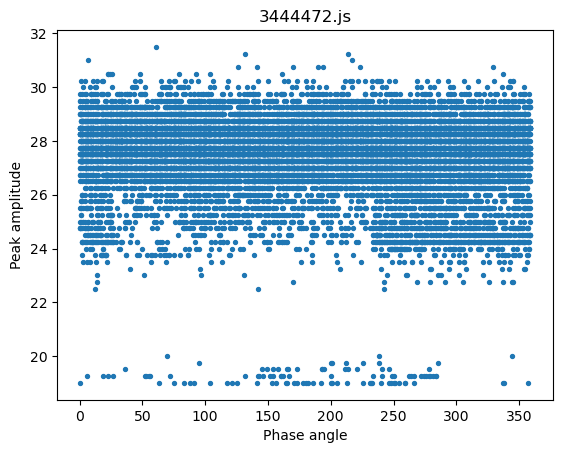

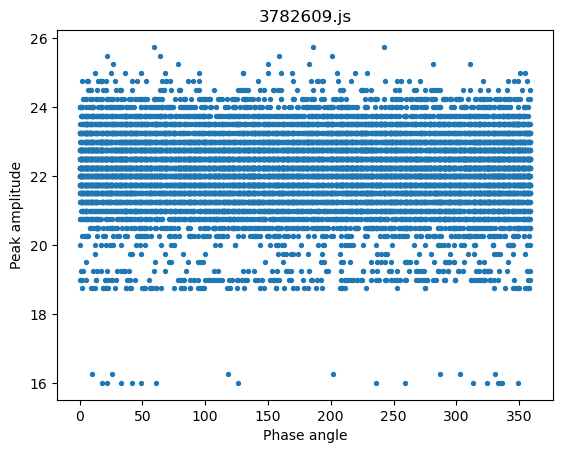

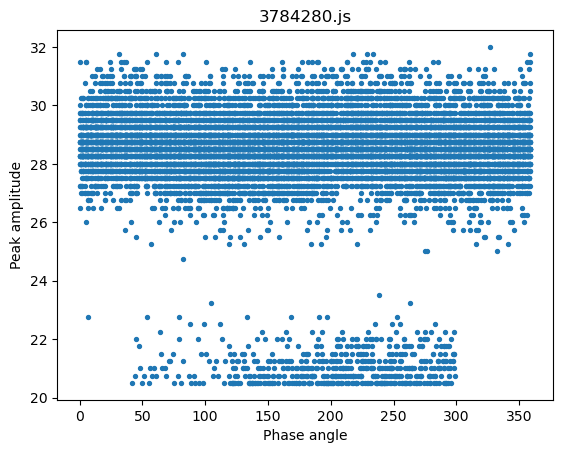

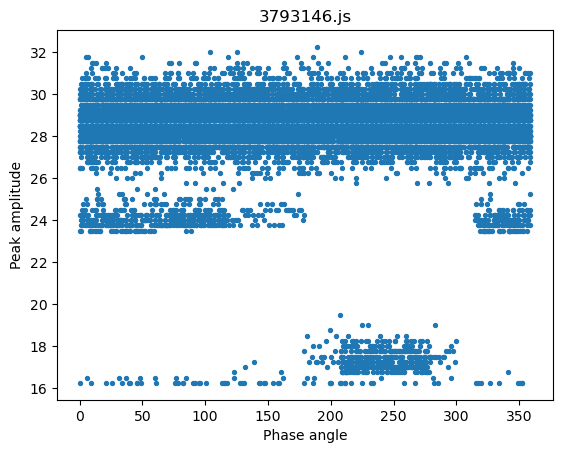

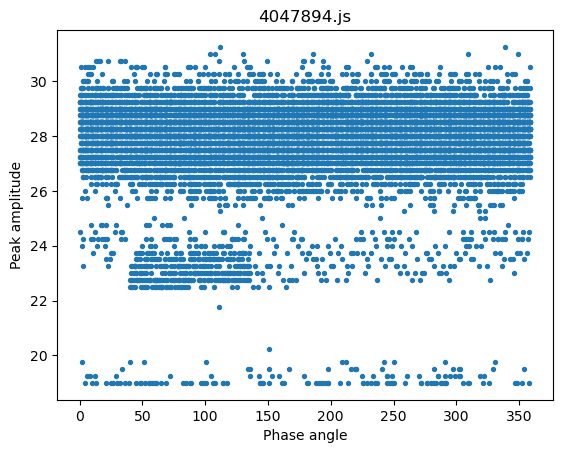

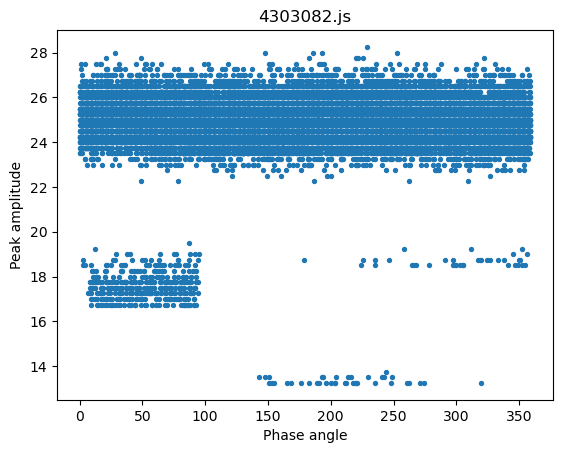

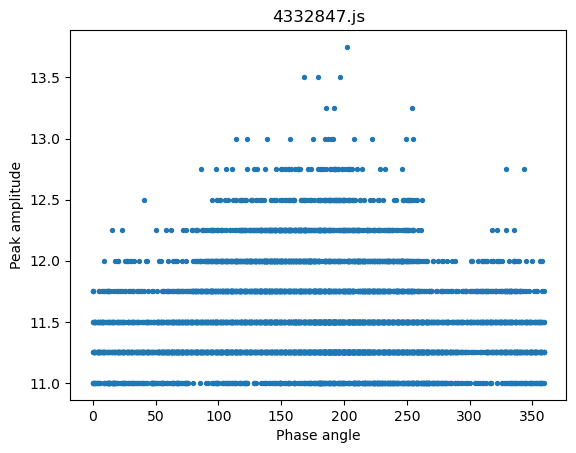

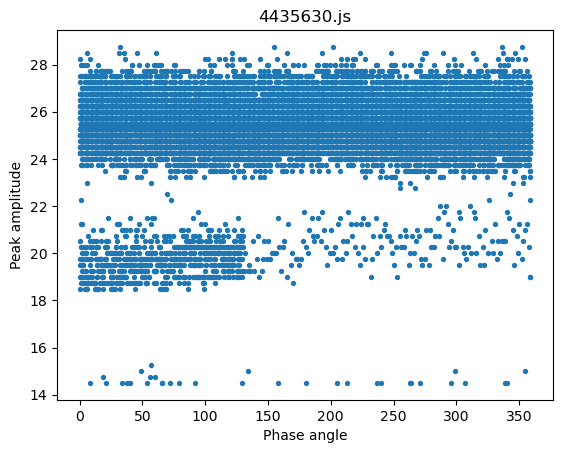

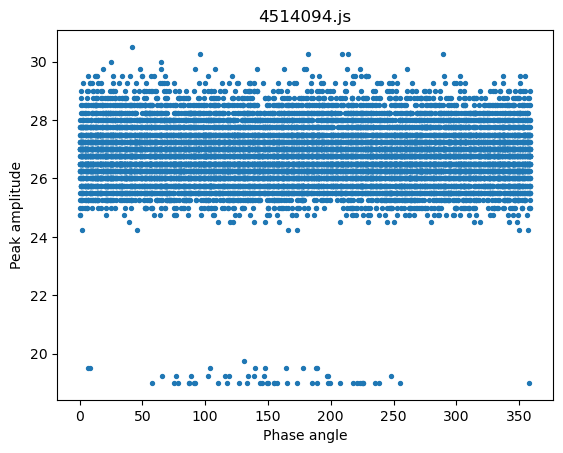

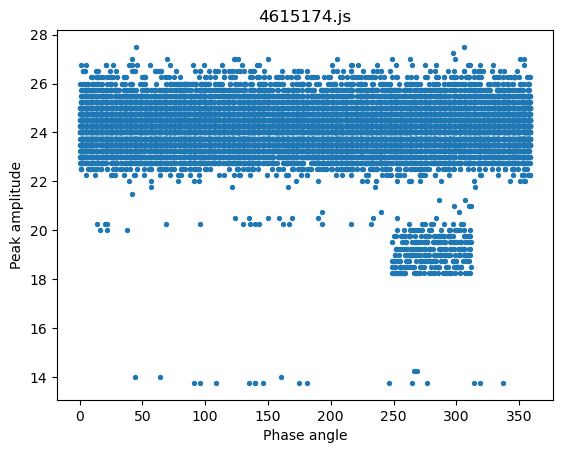

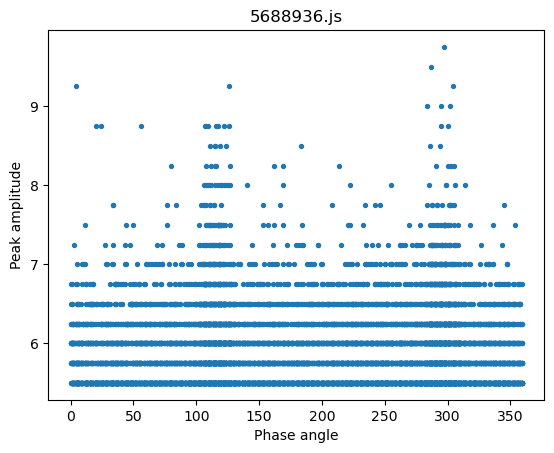

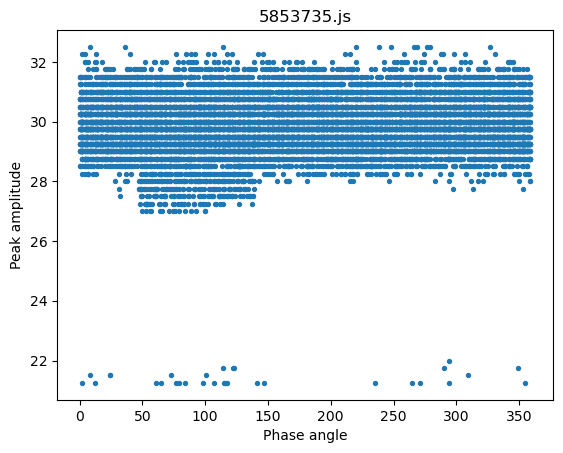

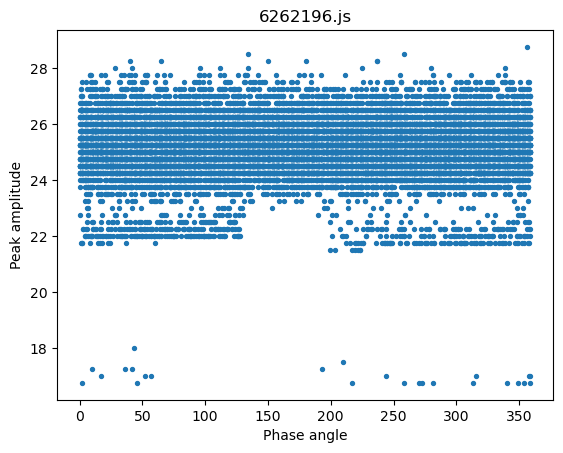

In [19]:
for dataframe in filtered_dataframes: #show new graphs with threshold removed
    fig, ax = plt.subplots()
    ax.scatter(dataframe['phase_angle'], dataframe['peak_amplitude'], s=8)
    ax.set_title(dataframe['filename'].iloc[0])
    ax.set_xlabel('Phase angle')
    ax.set_ylabel('Peak amplitude')


In [20]:
# Initialize lists for the cluster features
for df in filtered_dataframes:
    # Extract the relevant columns
    X = df[['phase_angle', 'peak_amplitude']].values
    
    # Apply DBSCAN to the data
    dbscan = DBSCAN(eps=7, min_samples=8)
    dbscan.fit(X)
    labels = dbscan.labels_
    
    # Create a copy of the dataframe to avoid SettingWithCopyWarning
    df_copy = df.copy()
    df_copy['cluster_length'] = np.nan
    df_copy['cluster_height'] = np.nan
    df_copy['cluster_gradient_tr'] = np.nan
    df_copy['cluster_gradient_tl'] = np.nan
    
    # Add the cluster labels to the dataframe copy
    df_copy['cluster'] = labels
    
    # Access cluster information
    clusters = set(labels)
    for cluster in clusters:
        if cluster != -1:
            # Get the points belonging to the cluster
            cluster_points = X[labels == cluster]

            
            # Calculate cluster features
            cluster_length = cluster_points[:, 0].max() - cluster_points[:, 0].min()
            cluster_height = cluster_points[:, 1].max() - cluster_points[:, 1].min()
            cluster_gradient_tr = (cluster_points[:, 1].max() - cluster_points[:, 1].min()) / (cluster_points[:, 0].max() - cluster_points[:, 0].min())
            cluster_gradient_tl = (cluster_points[:, 1].max() - cluster_points[:, 1].min()) / (cluster_points[:, 0].min() - cluster_points[:, 0].max())
            
            # Add new columns for cluster features to the dataframe copy
            df_copy.loc[labels == cluster, 'cluster_length'] = cluster_length
            df_copy.loc[labels == cluster, 'cluster_height'] = cluster_height
            df_copy.loc[labels == cluster, 'cluster_gradient_tr'] = cluster_gradient_tr
            df_copy.loc[labels == cluster, 'cluster_gradient_tl'] = cluster_gradient_tl
    
    # Assign the cluster labels and features to the original dataframe
    df.loc[:, 'cluster'] = df_copy['cluster']
    df.loc[:, 'cluster_length'] = df_copy['cluster_length']
    df.loc[:, 'cluster_height'] = df_copy['cluster_height']
    df.loc[:, 'cluster_gradient_tr'] = df_copy['cluster_gradient_tr']
    df.loc[:, 'cluster_gradient_tl'] = df_copy['cluster_gradient_tl']
    
    # # Plot the clustered data
    # plt.scatter(df['phase_angle'], df['peak_amplitude'], c=df['cluster'], cmap='viridis', s=8)
    # plt.title(df['filename'].iloc[0])
    # plt.xlabel('Phase angle')
    # plt.ylabel('Peak amplitude')
    # plt.show()


In [21]:
# def plot_cluster_bounds(cluster_points):
#     x_min, x_max = cluster_points[:, 0].min(), cluster_points[:, 0].max()
#     y_min, y_max = cluster_points[:, 1].min(), cluster_points[:, 1].max()
#     plt.plot([x_min, x_max], [y_min, y_min], 'k-', linewidth=2)
#     plt.plot([x_max, x_max], [y_min, y_max], 'k-', linewidth=2)
#     plt.plot([x_max, x_min], [y_max, y_max], 'k-', linewidth=2)
#     plt.plot([x_min, x_min], [y_max, y_min], 'k-', linewidth=2)


# for df in filtered_dataframes:
#     # Extract the relevant columns
#     X = df[['phase_angle', 'peak_amplitude']].values
    
#     # Apply DBSCAN to the data
#     dbscan = DBSCAN(eps=10, min_samples=10)
#     dbscan.fit(X)
#     labels = dbscan.labels_
    
#     # Add the cluster labels to the dataframe
#     df['cluster'] = labels
    
#     # Create new columns for each cluster label
#     dummies = pd.get_dummies(df['cluster'], prefix='cluster')
#     df = pd.concat([df, dummies], axis=1)
    
#     # Access cluster information
#     clusters = set(labels)
#     for cluster in clusters:
#         if cluster != -1:
#             # Get the points belonging to the cluster
#             cluster_points = X[labels == cluster]
            
#             # Calculate cluster features
#             cluster_length = cluster_points[:, 0].max() - cluster_points[:, 0].min()
#             cluster_height = cluster_points[:, 1].max() - cluster_points[:, 1].min()
#             cluster_gradient_tr = (cluster_points[:, 1].max() - cluster_points[:, 1].min()) / (cluster_points[:, 0].max() - cluster_points[:, 0].min())
#             cluster_gradient_tl = (cluster_points[:, 1].max() - cluster_points[:, 1].min()) / (cluster_points[:, 0].min() - cluster_points[:, 0].max())
            
#             # Print cluster information
#             print(f"Cluster {cluster}: Length={cluster_length}, Height={cluster_height}, GradientTR={cluster_gradient_tr}, GradientTL={cluster_gradient_tl}")
            
#             # Plot the boundaries of the cluster
#             plot_cluster_bounds(cluster_points)
    
#     # Plot the clustered data
#     plt.scatter(df['phase_angle'], df['peak_amplitude'], c=df['cluster'], cmap='viridis', s=8)
#     plt.title(df['filename'].iloc[0])
#     plt.xlabel('Phase angle')
#     plt.ylabel('Peak amplitude')
#     plt.show()


In [22]:
print(filtered_dataframes[0])

      peak_amplitude  integral  phase_angle  cycle_number  rise_time  \
88              1.25       736           45          8862          0   
96              1.25       565          172          8863          0   
109             1.25      3589          130          8864          0   
348             1.25     -1287          108          8887          0   
368             1.25      1715          350          8888          0   
...              ...       ...          ...           ...        ...   
5255            1.50     -2865            6          9289          0   
5376            1.25      1444          241          9298        449   
5413            1.25     -1362          277          9299          0   
5429            1.25       611          245          9301          0   
5430            1.25       354          263          9301          0   

      pulse_width    filename  anomaly  bucket  cluster  filtered  \
88              0  1047582.js        1     4.0       -1      True 

In [23]:
# drop useless columns
for df in filtered_dataframes:
    df.drop(["integral", "cycle_number", "filtered", "bucket", "filename"], axis=1, inplace=True)

In [24]:
print(filtered_dataframes[0]) # integers in this column indicate the cluster that they belong to, if its a -1 it means that it is an outlier and is not included in any clusters

      peak_amplitude  phase_angle  rise_time  pulse_width  anomaly  cluster  \
88              1.25           45          0            0        1       -1   
96              1.25          172          0            0        1       -1   
109             1.25          130          0            0        1       -1   
348             1.25          108          0            0        1       -1   
368             1.25          350          0            0        1       -1   
...              ...          ...        ...          ...      ...      ...   
5255            1.50            6          0            0        1       -1   
5376            1.25          241        449          449        1       -1   
5413            1.25          277          0            1        1       -1   
5429            1.25          245          0            0        1       -1   
5430            1.25          263          0            0        1       -1   

      cluster_length  cluster_height  cluster_gradi

In [25]:
# convert list of dataframes into 1 big dataframe
big_df = pd.concat(filtered_dataframes, ignore_index=True)

In [26]:
big_df.isna().sum()
# missing = big_df.isna().any(axis=1)
# print(df[missing])

peak_amplitude           0
phase_angle              0
rise_time                0
pulse_width              0
anomaly                  0
cluster                  0
cluster_length         591
cluster_height         591
cluster_gradient_tr    592
cluster_gradient_tl    592
dtype: int64

In [27]:
big_df.fillna(0, inplace=True)


In [28]:
big_df.isna().sum()

peak_amplitude         0
phase_angle            0
rise_time              0
pulse_width            0
anomaly                0
cluster                0
cluster_length         0
cluster_height         0
cluster_gradient_tr    0
cluster_gradient_tl    0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# Split the data into training and testing sets
train_dfs, test_dfs = train_test_split(big_df, test_size=0.2, random_state=42)

# Define the features and target variables
features = ['peak_amplitude', 'phase_angle', 'rise_time', 'pulse_width', 'cluster', 'cluster_length', 'cluster_height', 'cluster_gradient_tr', 'cluster_gradient_tl']
target = 'anomaly' # Replace this with the name of the target column you want to predict

# # Split the data into features and target
# X = big_df[features]
# y = big_df[target]

# # Train the decision tree model with 5-fold cross-validation
# model = DecisionTreeClassifier(random_state=42)
# scores = cross_val_score(model, X, y, cv=5)

# Train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(train_dfs[features], train_dfs[target])

# Make predictions on the testing set
predictions = model.predict(test_dfs[features])

# Calculate the accuracy of the model
accuracy = accuracy_score(test_dfs[target], predictions)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_dfs[target], predictions)
print(report)


Accuracy: 0.9944230501554308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64740
           1       1.00      1.00      1.00     14600
           2       0.99      0.99      0.99     28425

    accuracy                           0.99    107765
   macro avg       0.99      0.99      0.99    107765
weighted avg       0.99      0.99      0.99    107765

